#Tugas Group Project 1
**Kelompok 10**
1. Hardhika Propitadewa (5026201015)
2. Tasya Putri Aliya (5026211116)
3. Alya Resti Saraswati (5026211057)
4. I Gusti Made Arisudana (5026211188)

#### **Import Libraries**


**Importing Dependables (Prerequsites)**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
pd.set_option('display.max_columns',None) # to see ALL COLUMNS in a DataFrame table. 'None' means there is no limit for displayed columns.
# pd.set_option('display.max_rows',None) # to see ALL ROWS in a DataFrame table.

####**Import Database**

In [ ]:
TGP1 = pd.read_csv('Data utk TGP #1.csv', delimiter =';')
TGP1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#1. Praproses Data

In [ ]:
# Menampilkan tipe data masing-masing kolom
TGP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


####**Memeriksa Missing Value**

In [ ]:
#Cek apakah terdapat baris yang kosong
TGP1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [ ]:
col_with_unknown = []
unknown_count = (TGP1 == "unknown").sum()
for col, count in unknown_count.items():
    value_count = TGP1[col].value_counts()
    if count > 0:
        col_with_unknown.append(col)
        print(f"{col} {value_count} \n")

job blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

education secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

contact cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

poutcome unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64 



####**Mengatasi Missing Value**

tidak dilakukan drop poutcome walaupun banyak nilai unknown, karena untuk menyesuaikan soal

In [ ]:
##TGP1_new = TGP1.drop(columns='poutcome')
##TGP1_new

In [ ]:
#TGP1_new = TGP1_new.replace('unknown', np.nan)
##TGP1_new = TGP1_new.dropna()
#TGP1_new = TGP1_new.reset_index(drop=True)
#TGP1_new.head()

Pengisian Missing Value kepada data yang memiliki value unknown menggunakan mode dan median value pada kolom job, contact, dan education

In [ ]:
#for col in col_with_unknown:
  #TGP1_max = TGP1[col].value_counts().idxmax()
  #TGP1[col].replace("unknown", TGP1_max, inplace=True)
#TGP1

In [ ]:
#periksa kembali data
#col_with_unknown = []
#unknown_count = (TGP1 == "unknown").sum()
#for col, count in unknown_count.items():
   # value_count = TGP1[col].value_counts()
    #if count > 0:
     #   col_with_unknown.append(col)
      #  print(f"{col} {value_count} \n")

####**Memeriksa data dupilkat**

In [ ]:
#Cek data yang duplikat
jumlah_baris_duplikat = TGP1.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


####**Mapping bool column**

Merupakan bagian dari praproses data namun ditaruh di atas bagian praproses karena dibutuhkan dalam menghitung korelasi

In [ ]:
TGP1 = TGP1.replace({'default' : {'yes': True , 'no': False}})
TGP1 = TGP1.replace({'housing' : {'yes': True , 'no': False}})
TGP1 = TGP1.replace({'loan' : {'yes': True , 'no': False}})
TGP1 = TGP1.replace({'subscribe' : {'yes': True , 'no': False}})
TGP1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,False,2143,True,False,unknown,5,may,261,1,-1,0,unknown,False
1,44,technician,single,secondary,False,29,True,False,unknown,5,may,151,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,5,may,76,1,-1,0,unknown,False
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,5,may,92,1,-1,0,unknown,False
4,33,unknown,single,unknown,False,1,False,False,unknown,5,may,198,1,-1,0,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,False,825,False,False,cellular,17,nov,977,3,-1,0,unknown,True
45207,71,retired,divorced,primary,False,1729,False,False,cellular,17,nov,456,2,-1,0,unknown,True
45208,72,retired,married,secondary,False,5715,False,False,cellular,17,nov,1127,5,184,3,success,True
45209,57,blue-collar,married,secondary,False,668,False,False,telephone,17,nov,508,4,-1,0,unknown,False


####**Melakukan categorical encoding/Transformasi Data**

In [ ]:
# Mencari kategori apa saja pada sebuah kolom
kategori_job = TGP1['job'].unique()
kategori_marital = TGP1['marital'].unique()
kategori_education = TGP1['education'].unique()
kategori_contact = TGP1['contact'].unique()
kategori_month = TGP1['month'].unique()
kategori_poutcome = TGP1['poutcome'].unique()

print('kategori job:',kategori_job)
print('kategori marital:',kategori_marital)
print('kategori education:',kategori_education)
print('kategori contact:',kategori_contact)
print('kategori month:',kategori_month)
print('kategori_poutcome:', kategori_poutcome)

kategori job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
kategori marital: ['married' 'single' 'divorced']
kategori education: ['tertiary' 'secondary' 'unknown' 'primary']
kategori contact: ['unknown' 'cellular' 'telephone']
kategori month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
kategori_poutcome: ['unknown' 'failure' 'other' 'success']


In [ ]:
TGP1_encoded = TGP1.replace({'default': {True: 1, False: 0}})
TGP1_encoded = TGP1_encoded.replace({'housing': {True: 1, False: 0}})
TGP1_encoded = TGP1_encoded.replace({'loan': {True: 1, False: 0}})
TGP1_encoded = TGP1_encoded.replace({'subscribe': {True: 1, False: 0}})

In [ ]:
for column in TGP1_encoded:
    TGP1_encoded[column] = TGP1_encoded[column].astype('category')
    TGP1_encoded[column] = TGP1_encoded[column].cat.codes
TGP1_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


####**Mencari Outliers**

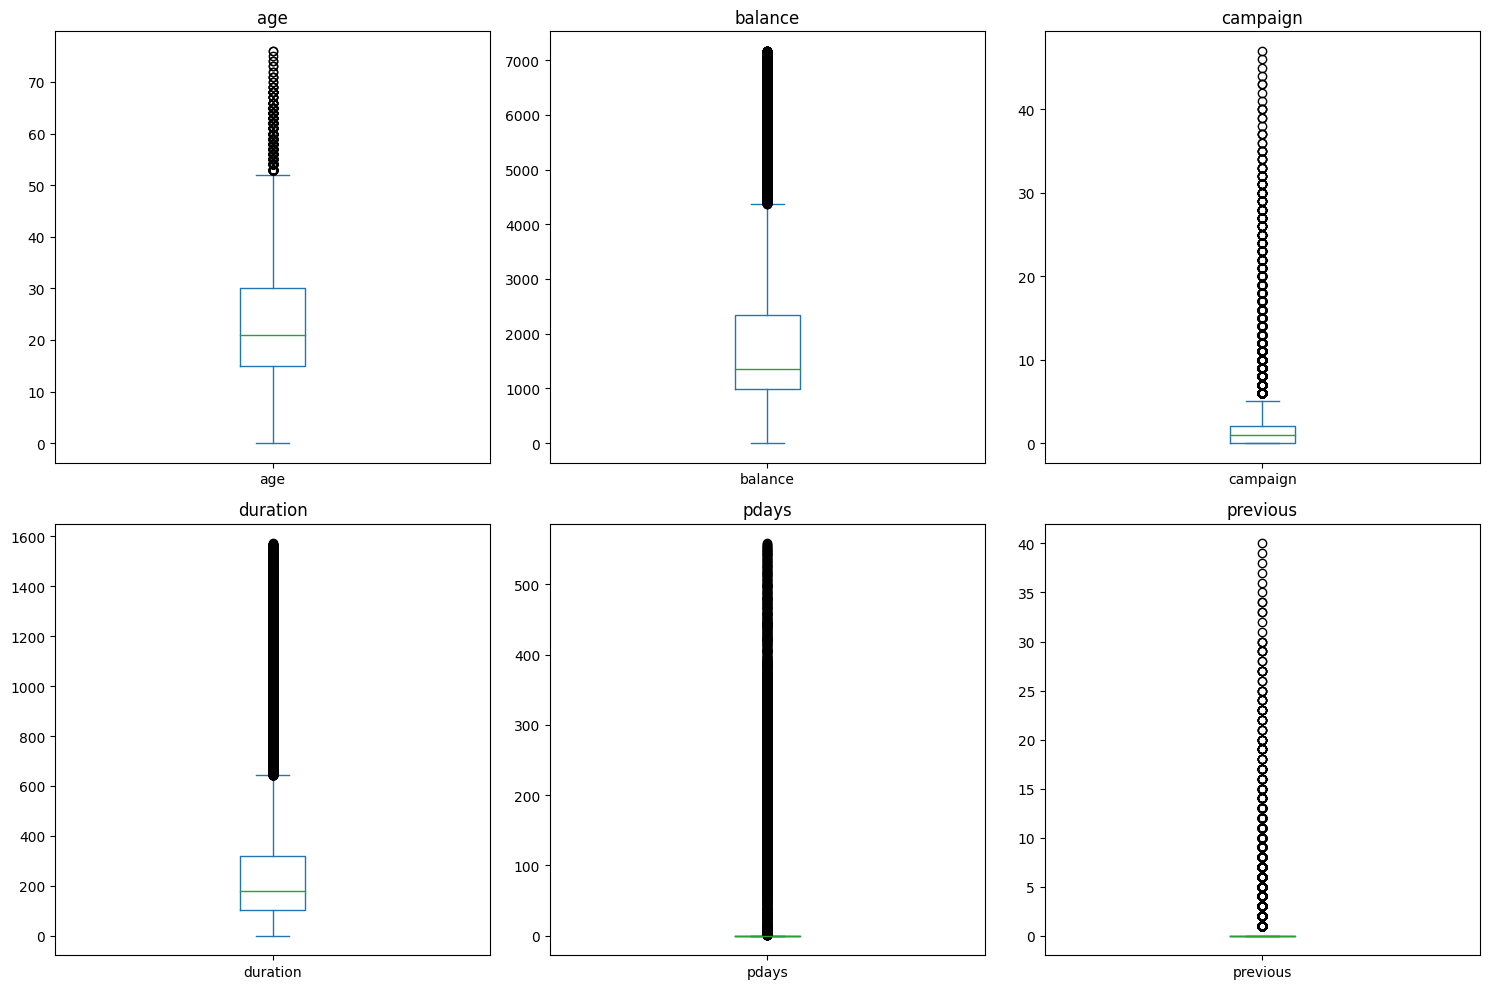

In [ ]:
numeric_column = ['age', 'balance', 'campaign', 'duration', 'pdays', 'previous']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(numeric_column):
    # Menentukan subplot yang sesuai
    row = i // 3
    col = i % 3

    # Membuat boxplot dalam subplot
    TGP1_encoded[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


####**Menghapus outliers**

In [ ]:
# Select only numeric columns
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(TGP1_encoded[numeric_columns]))

# Set the threshold for outlier detection
threshold = 1

# Create a boolean mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove rows with outliers
TGP1_cleaned = TGP1_encoded[~outlier_mask]

In [ ]:
TGP1_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
5,17,4,1,2,0,1147,1,0,2,4,8,139,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45167,30,0,1,1,0,1094,0,0,0,9,9,228,0,0,0,3,0
45187,14,7,2,1,0,2084,1,0,0,15,9,411,0,0,0,3,1
45197,18,4,2,1,0,2425,1,0,0,15,9,270,0,0,0,3,1
45198,19,4,1,2,0,2344,0,0,0,15,9,333,1,0,0,3,0


####**Visualisasi setelah praproses data**

<Figure size 1000x1000 with 0 Axes>

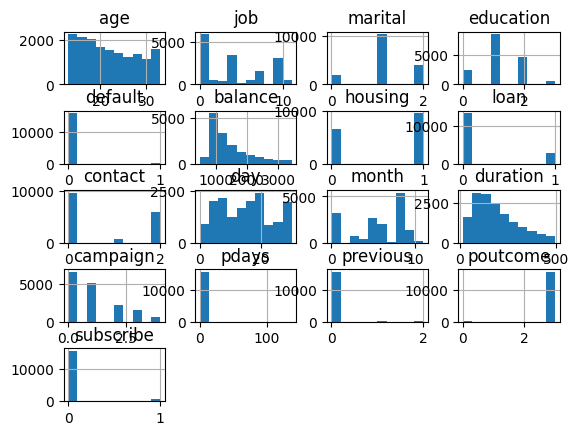

In [ ]:
plt.figure(figsize = (10, 10))
TGP1_cleaned.hist()
plt.subplots_adjust(hspace=0.5)
plt.show()

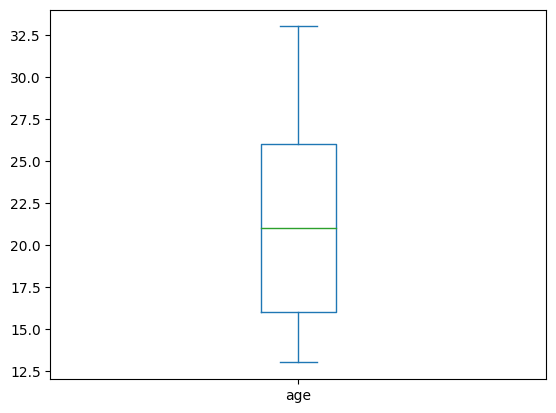

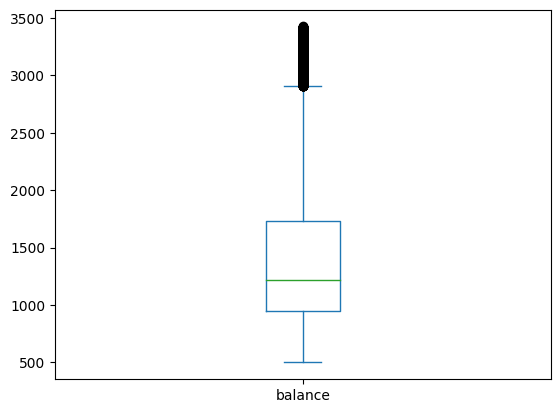

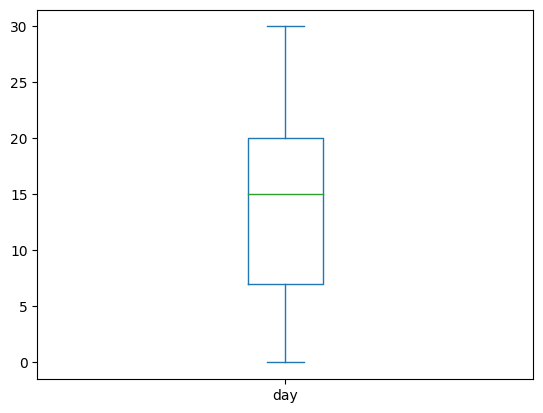

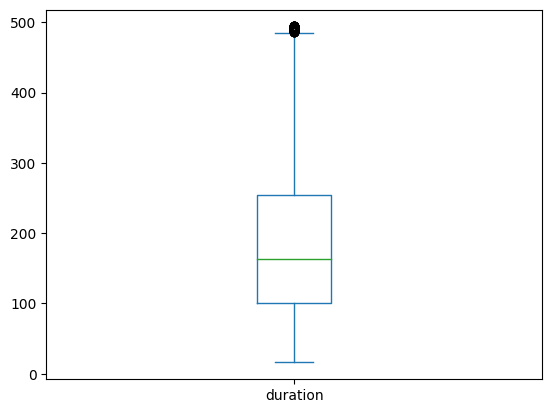

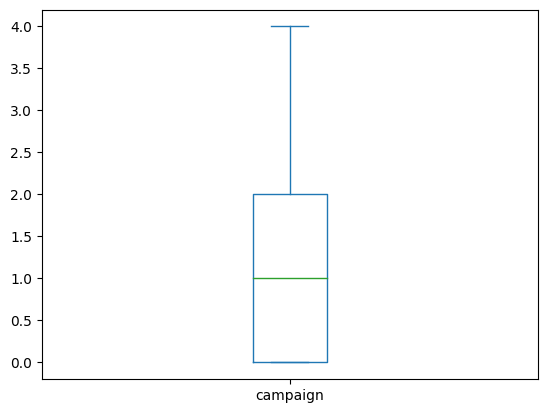

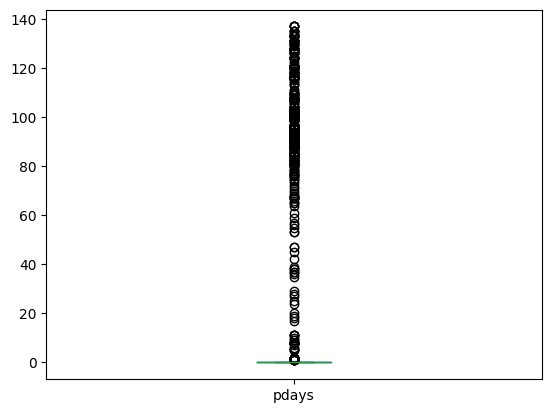

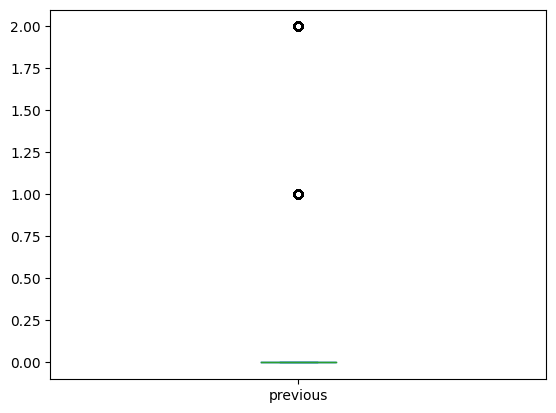

In [ ]:
for col in TGP1.select_dtypes(include='number').columns:
  print()
  TGP1_cleaned[col].plot(kind = "box")
  plt.show()

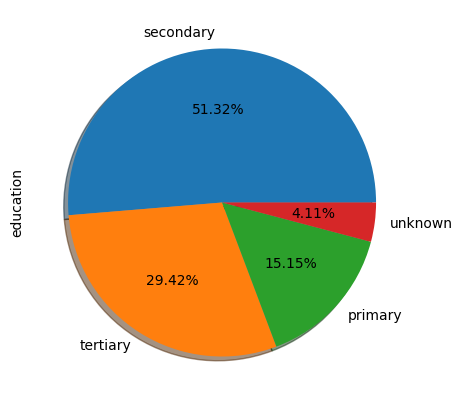

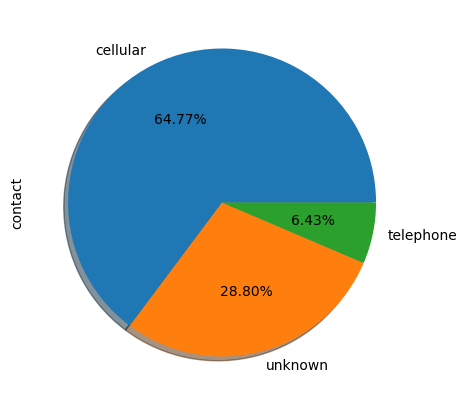

In [ ]:
pie_chart_cleaned = ["education", "contact"]
for col in TGP1[pie_chart_cleaned].columns:
  print()
  TGP1[col].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(5,5))
  plt.show()

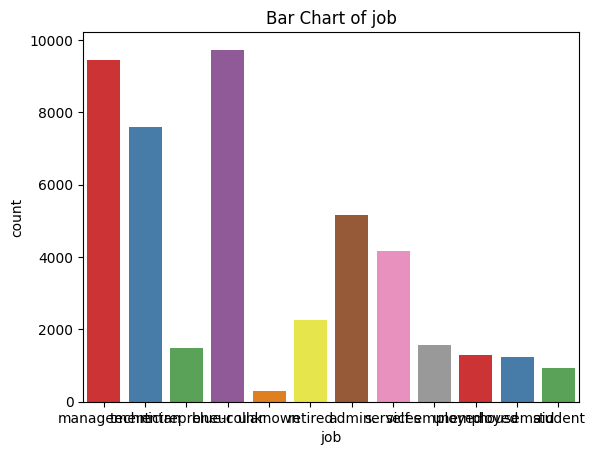

In [ ]:
sns.countplot(data=TGP1_cleaned, x=TGP1["job"], palette='Set1')
plt.title("Bar Chart of job")
plt.xlabel("job")
plt.ylabel("count")
plt.show()

In [ ]:
#sns.pairplot(data=TGP1_cleaned, hue='subscribe')

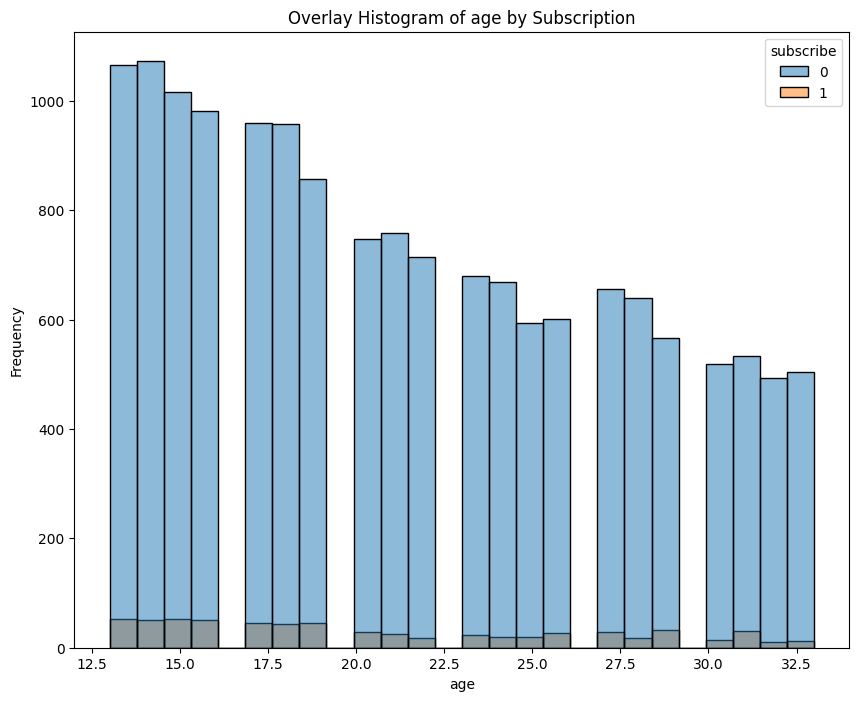

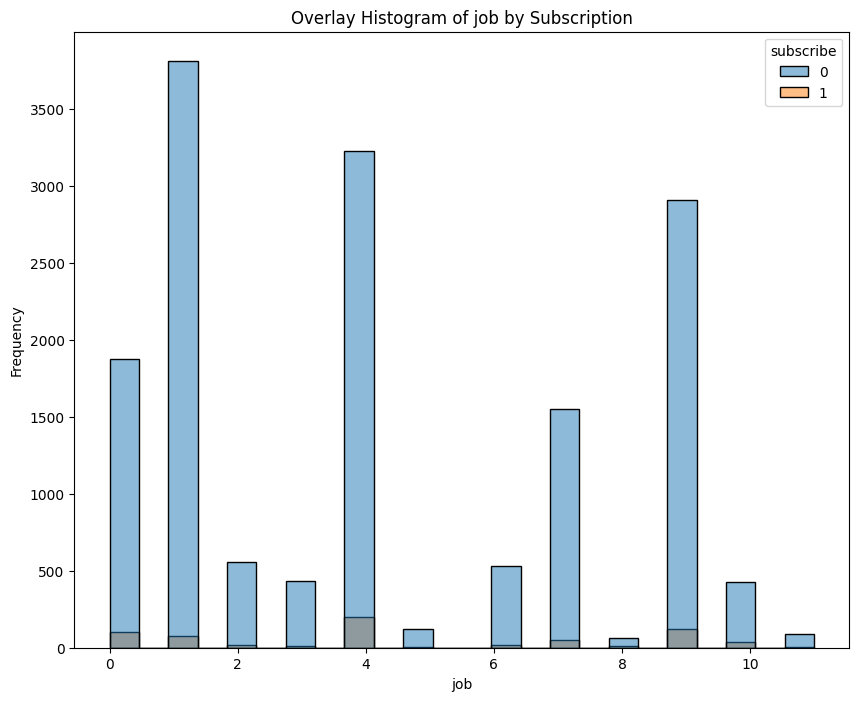

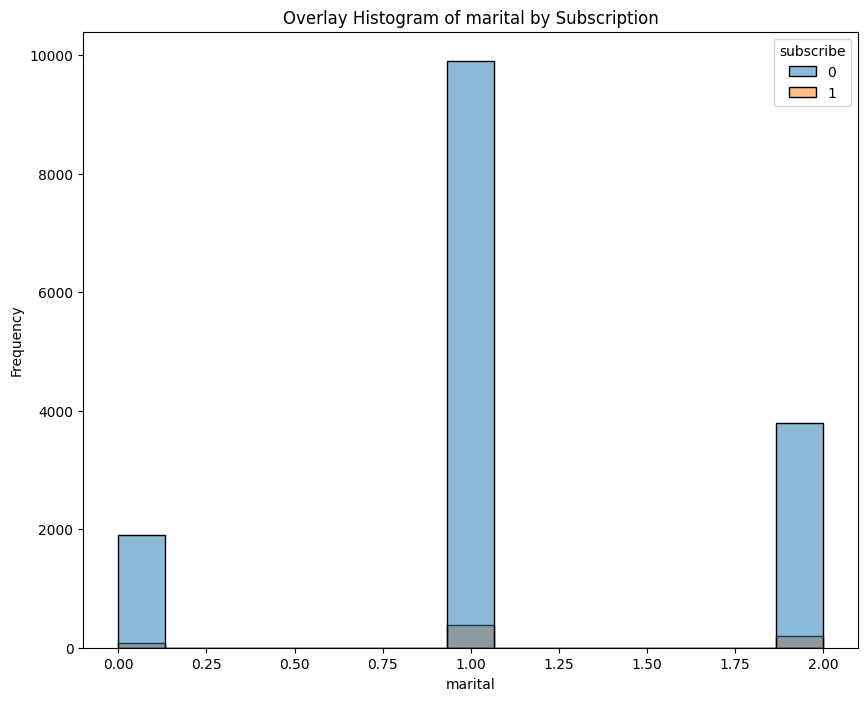

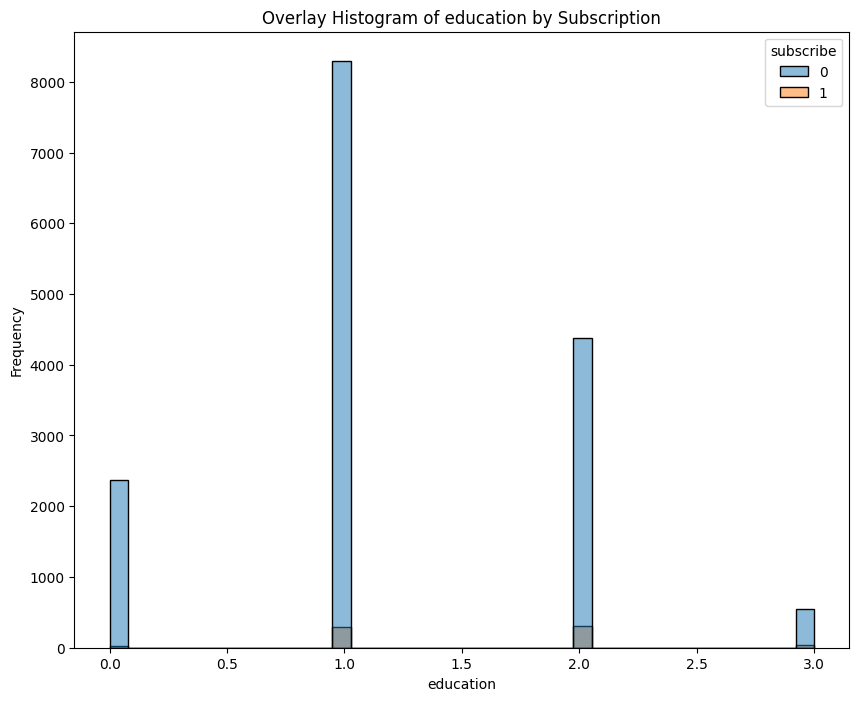

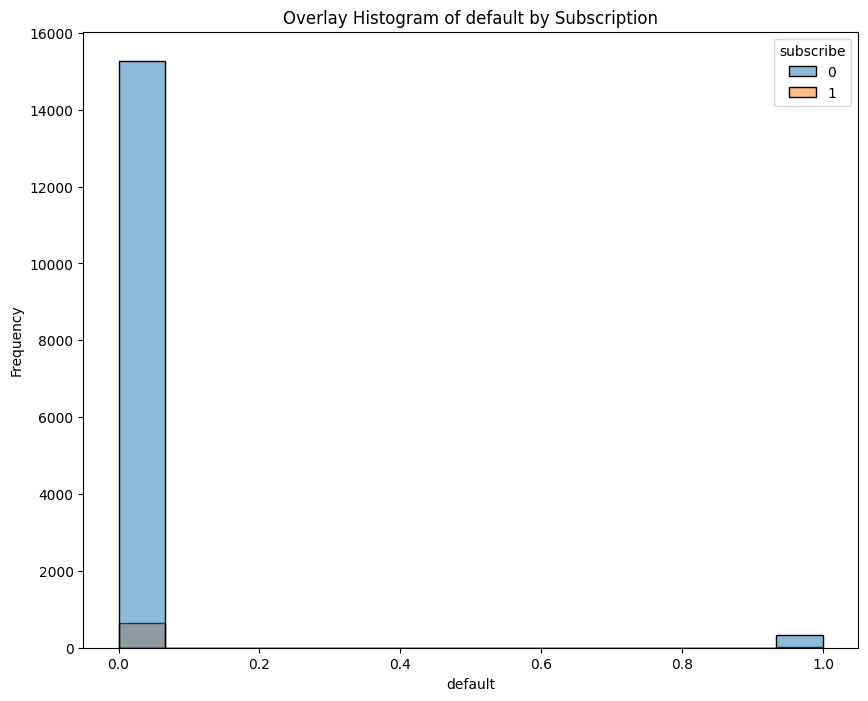

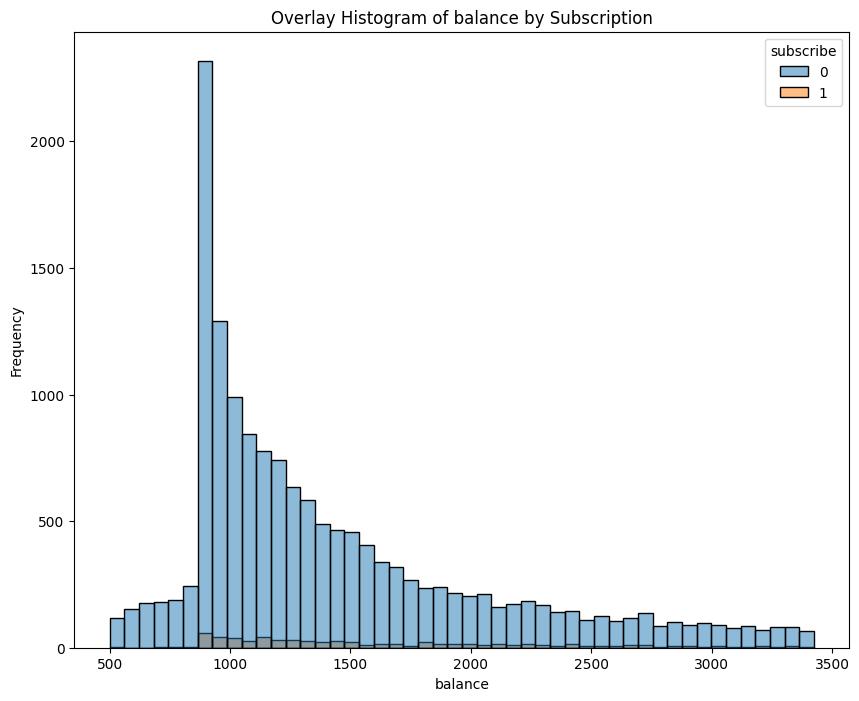

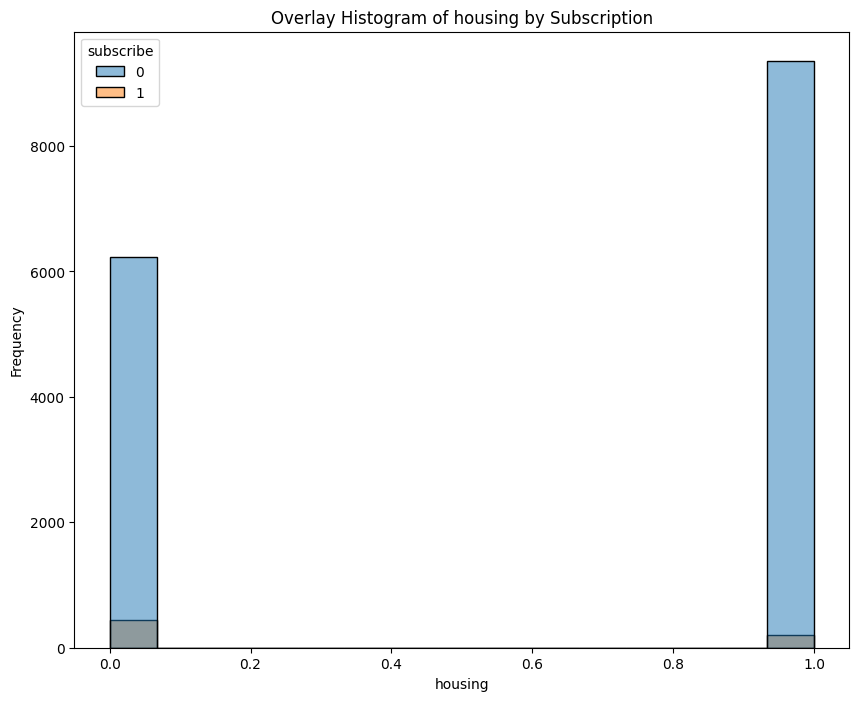

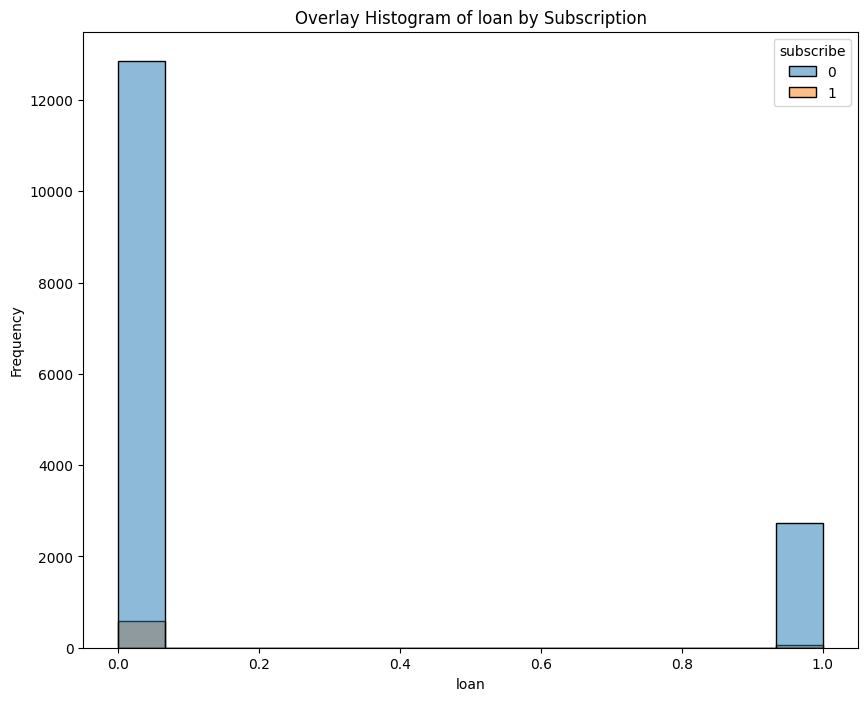

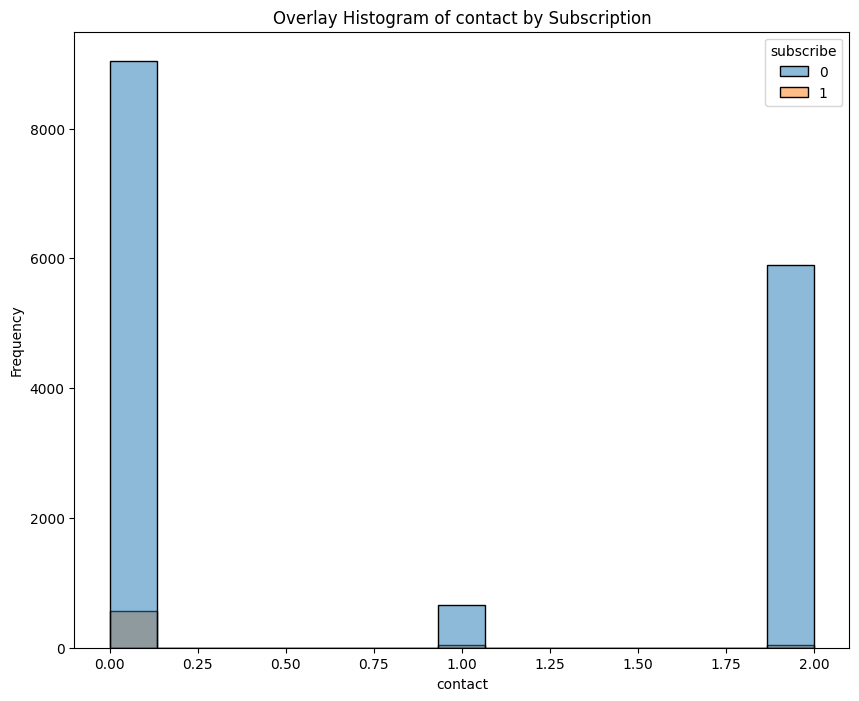

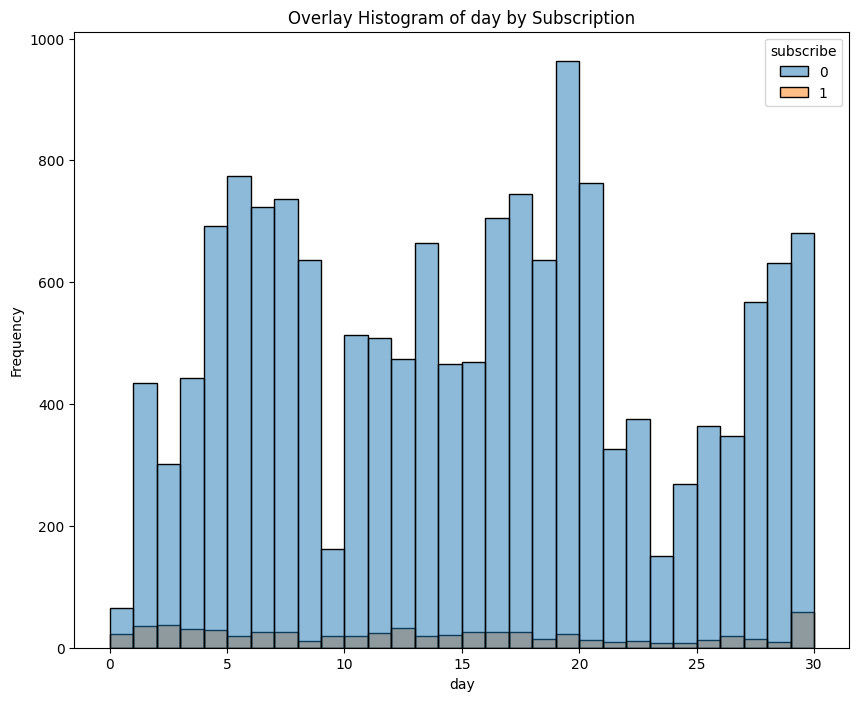

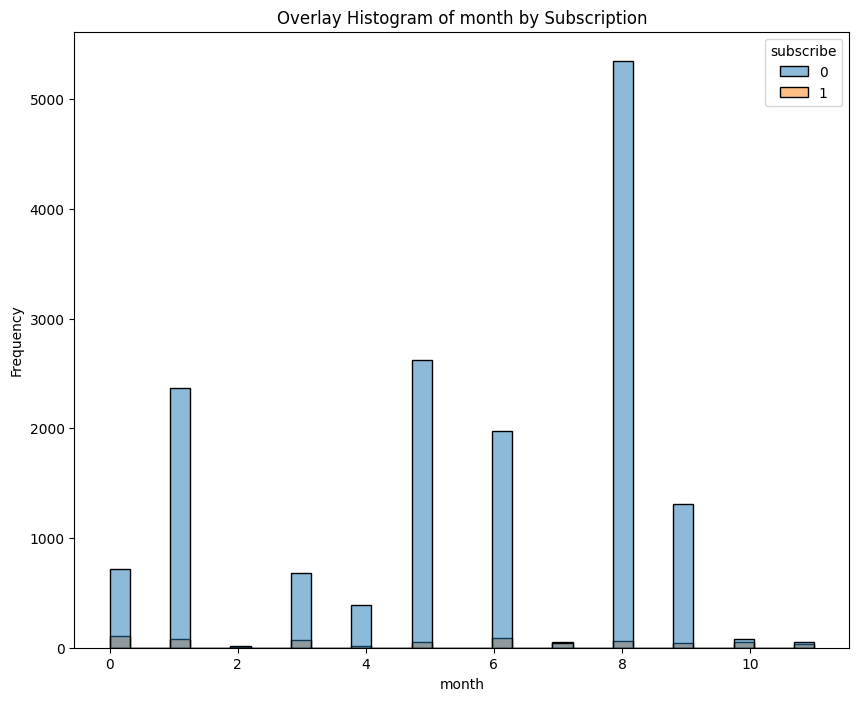

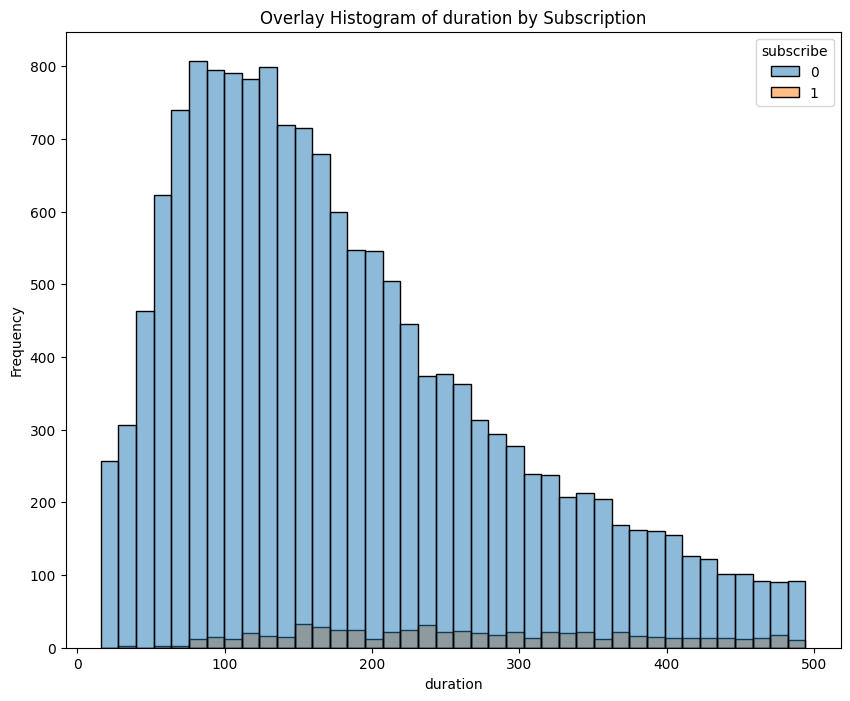

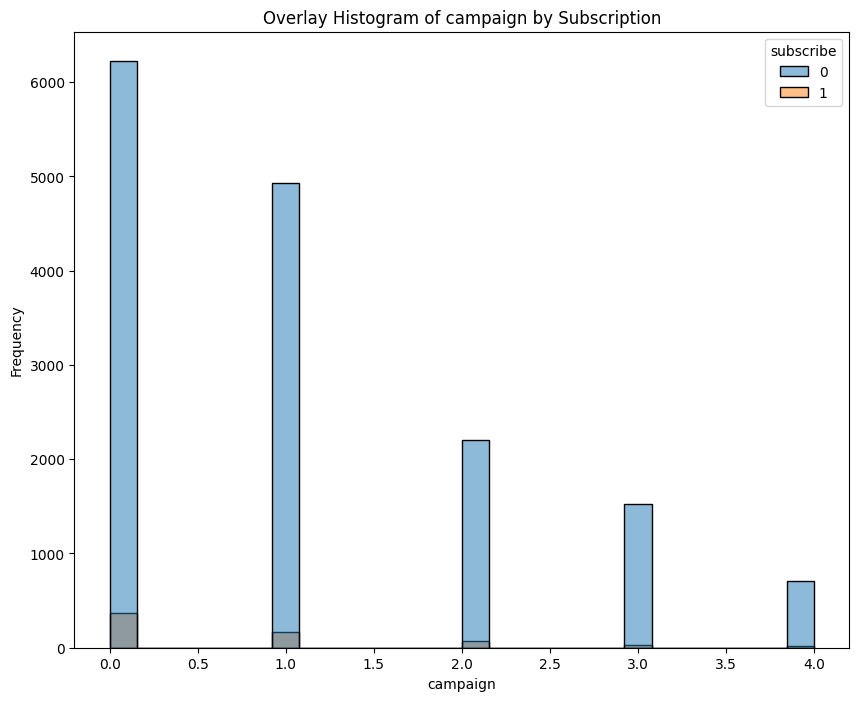

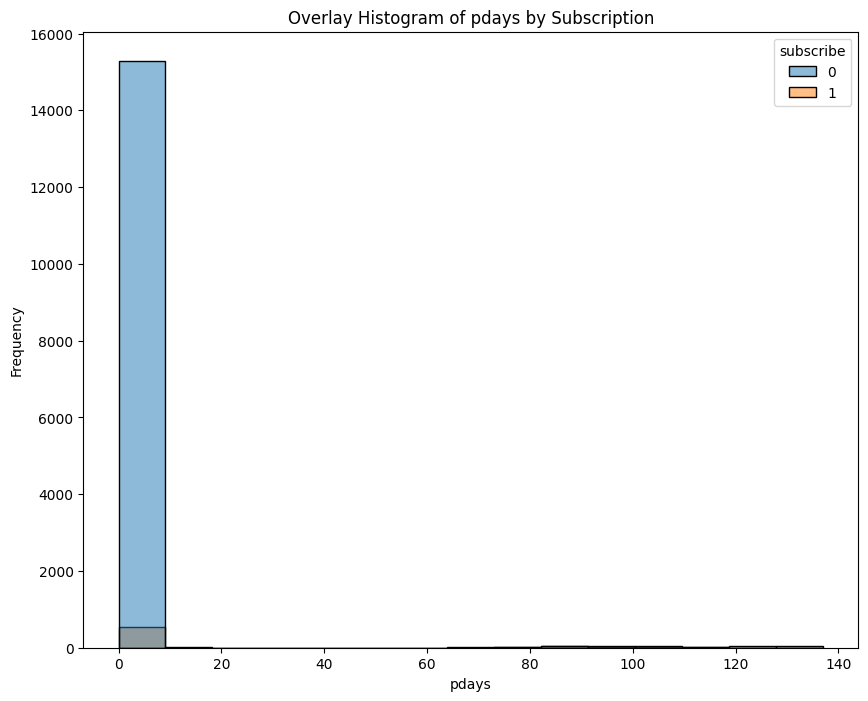

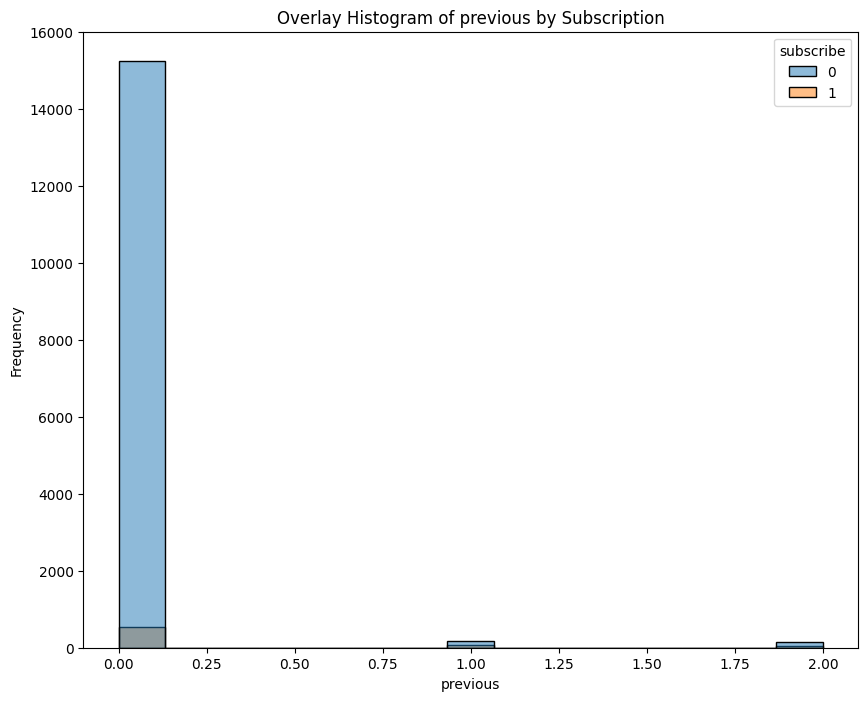

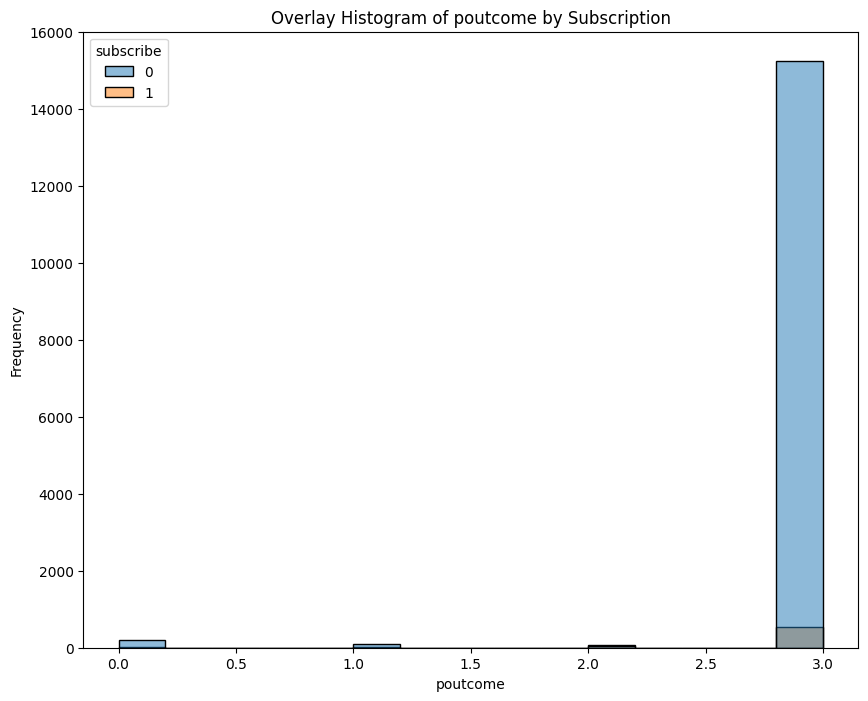

In [ ]:
target_column = 'subscribe'
col_plot_cleaned = [col for col in TGP1_cleaned.columns if col != target_column]
for column in col_plot_cleaned:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=TGP1_cleaned, x=column, hue=target_column,  common_norm=False)
    plt.title(f'Overlay Histogram of {column} by Subscription')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.show()

####**Korelasi setelah praproses data**

In [ ]:
TGP1_cleaned.corrwith(TGP1_cleaned["subscribe"]).sort_values(ascending=False)

subscribe    1.000000
pdays        0.174792
previous     0.172489
duration     0.152049
education    0.086566
balance      0.056477
job          0.023810
marital      0.021895
default     -0.015922
age         -0.026254
day         -0.034487
month       -0.038865
loan        -0.049366
campaign    -0.062856
poutcome    -0.112331
housing     -0.113516
contact     -0.127639
dtype: float64

# 2. Eksplorasi Data

####> Analisis Univariate

###### **Histogram Overview**

<Figure size 1000x1000 with 0 Axes>

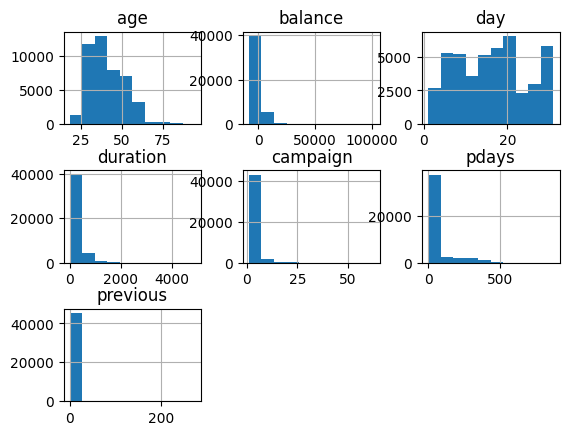

In [ ]:
plt.figure(figsize = (10, 10))
TGP1.hist()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
TGP1["age"].mean()
for i in TGP1:
  try:
    print(f"{i} mean is {TGP1[i].mean()}")
  except:
    continue

age mean is 40.93621021432837
default mean is 0.018026586450200173
balance mean is 1362.2720576850766
housing mean is 0.5558381809736569
loan mean is 0.16022649355245405
day mean is 15.80641879188693
duration mean is 258.1630797814691
campaign mean is 2.763840658246887
pdays mean is 40.19782796222158
previous mean is 0.5803233726305546
subscribe mean is 0.11698480458295547


######**Histogram untuk data bertipe number**

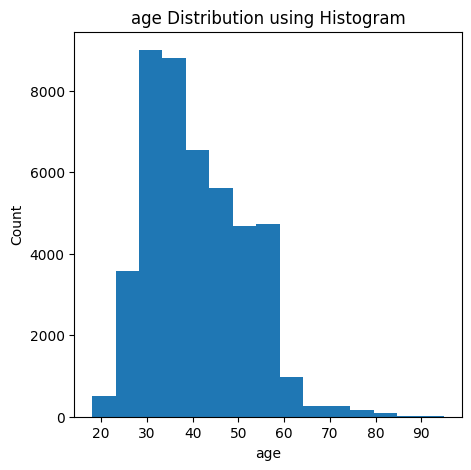

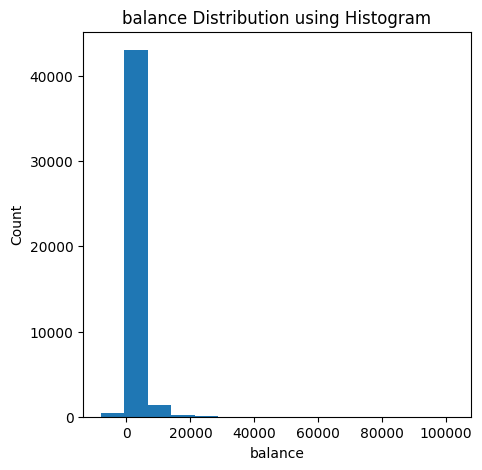

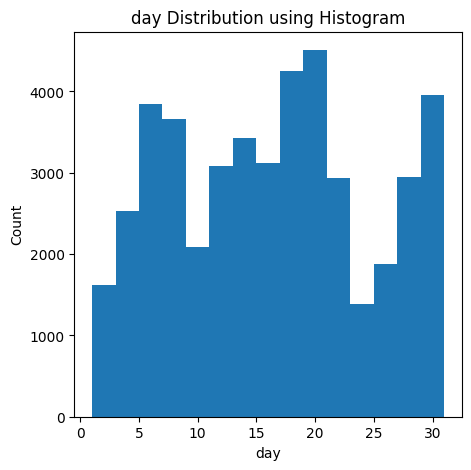

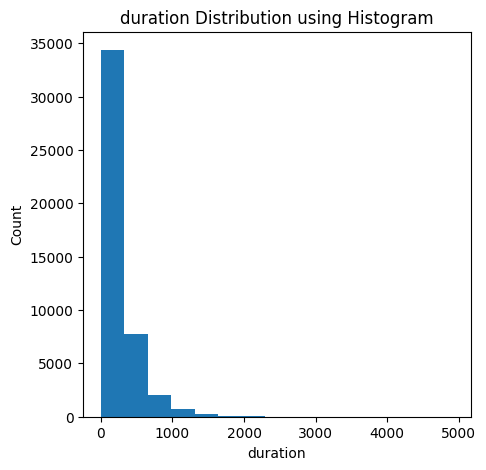

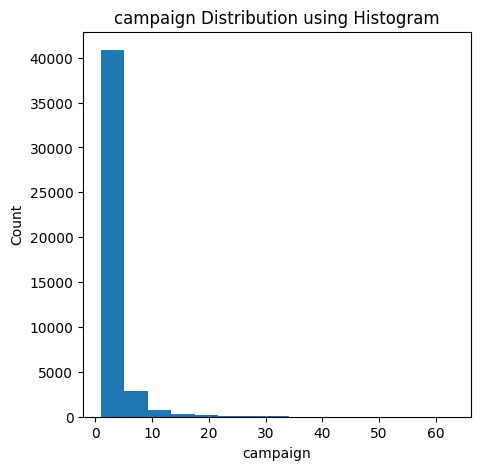

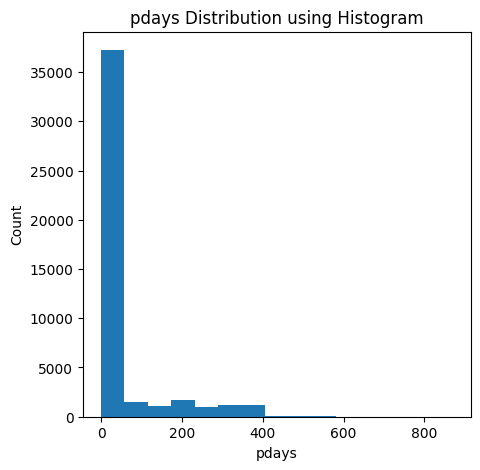

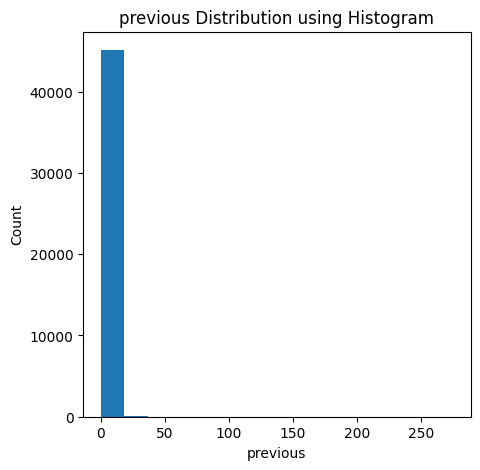

In [ ]:
for col in TGP1.select_dtypes(include='number').columns:
  print()
  plt.figure(figsize = (5, 5))  # Ukuran gambar
  plt.hist(TGP1[col], bins=15)  # Data yang ingin divisualisasikan
  plt.title(f"{col} Distribution using Histogram")  # Judul visualisasi
  plt.xlabel(col)  # Label sumbu x
  plt.ylabel("Count")  # Label sumbu y
  plt.show()

######**Box Plot untuk data bertipe number**

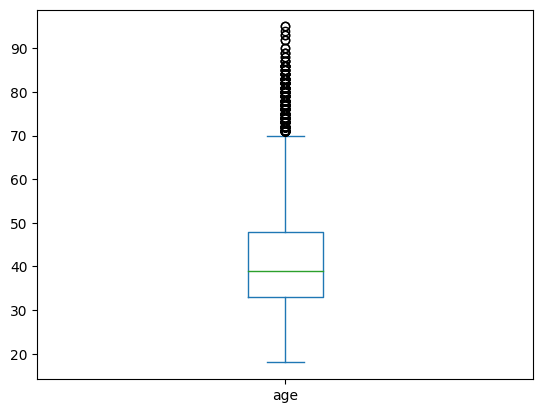

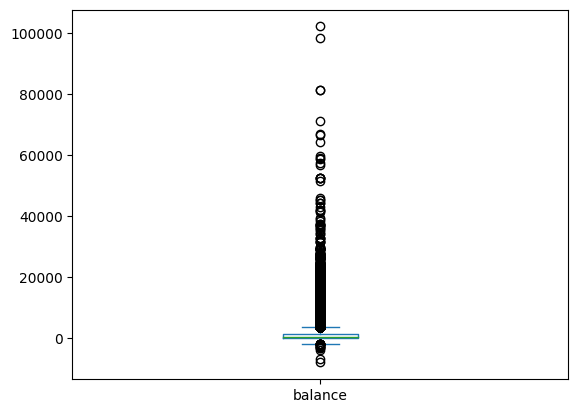

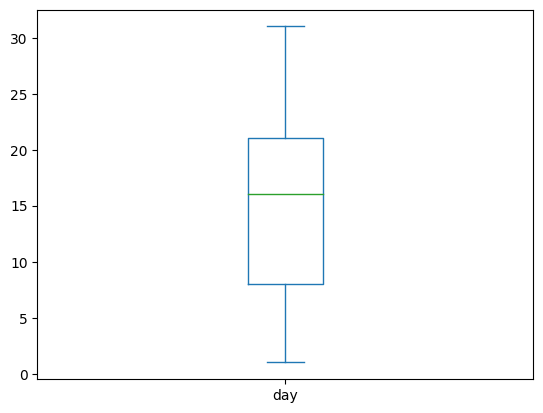

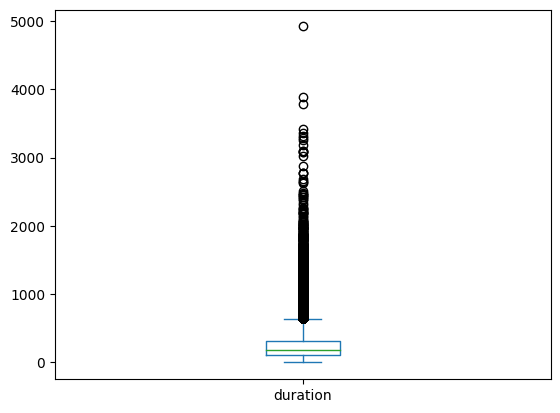

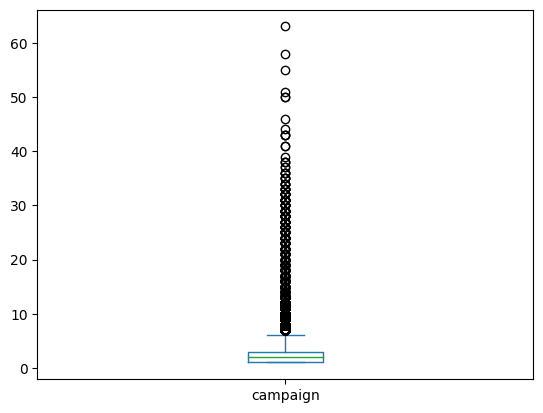

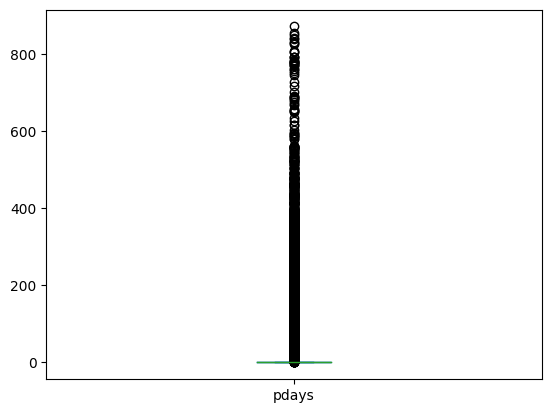

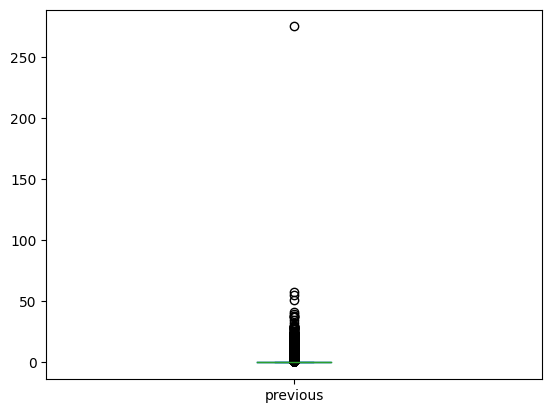

In [ ]:
for col in TGP1.select_dtypes(include='number').columns:
  print()
  TGP1[col].plot(kind = "box")
  plt.show()

######**Pie Chart untuk kolom bertipe data object**

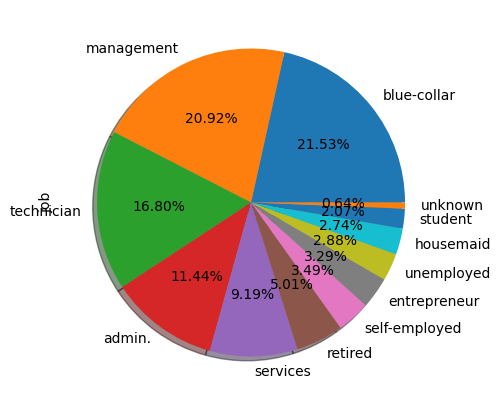

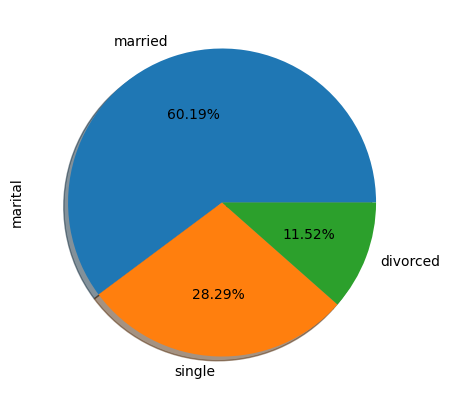

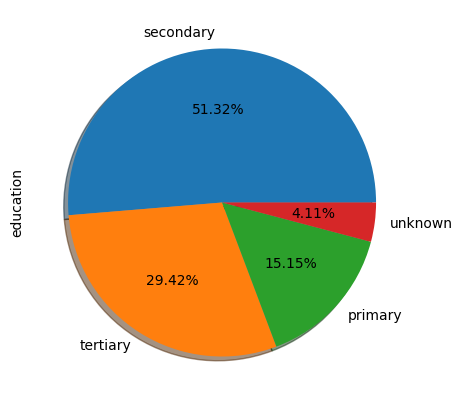

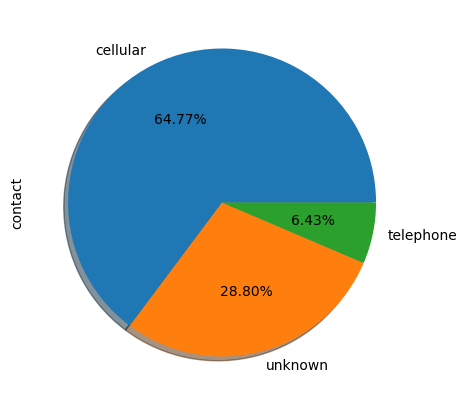

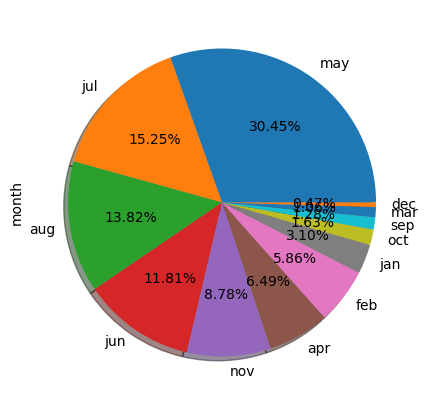

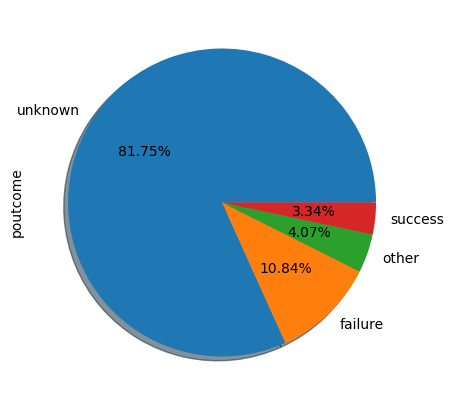

In [ ]:
for col in TGP1.select_dtypes(include='object').columns:
  print()
  TGP1[col].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(5,5))
  plt.show()

######**Bar Chart untuk kolom bertipe data object**

Untuk mendapatkan visualisasi terhadap beberapa data yang memiliki lebih dari 3 value maka dibuat visualisasi Bar Chart

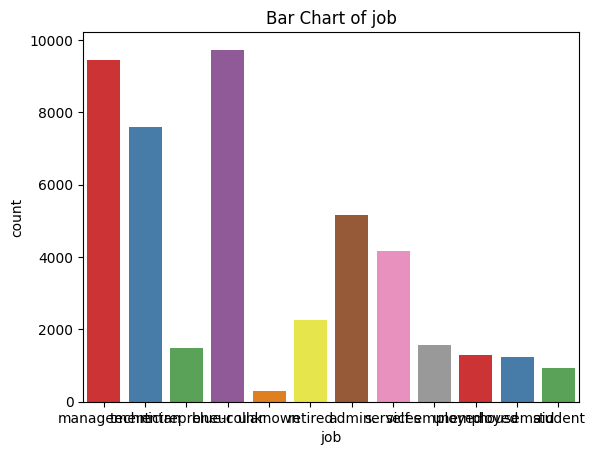

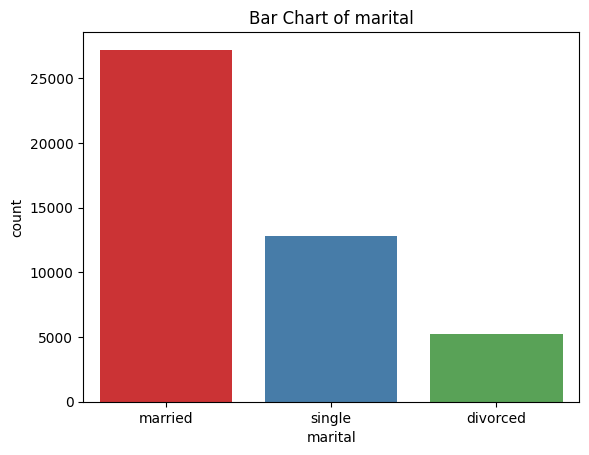

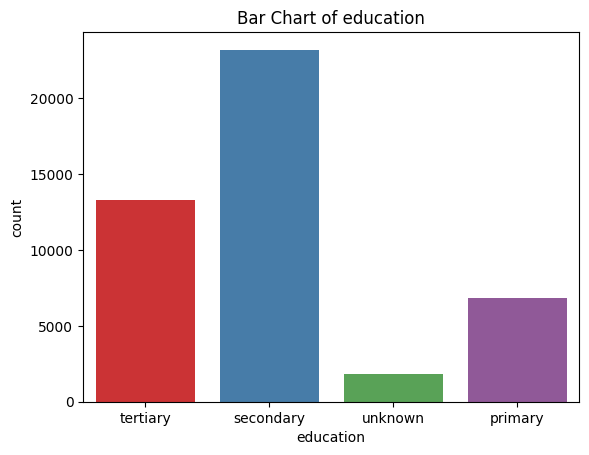

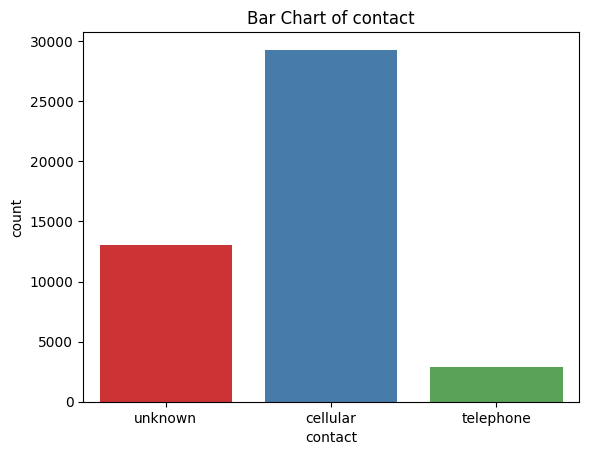

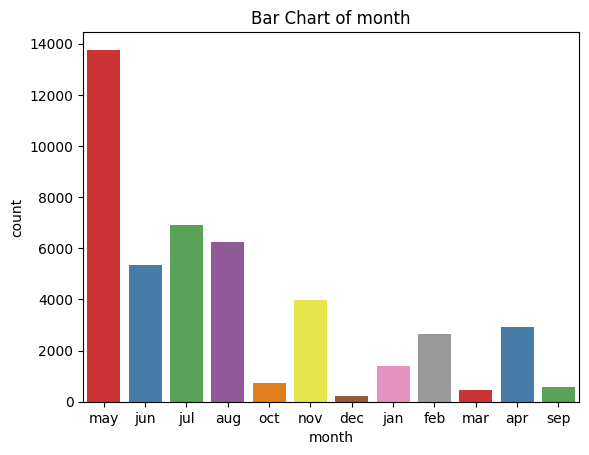

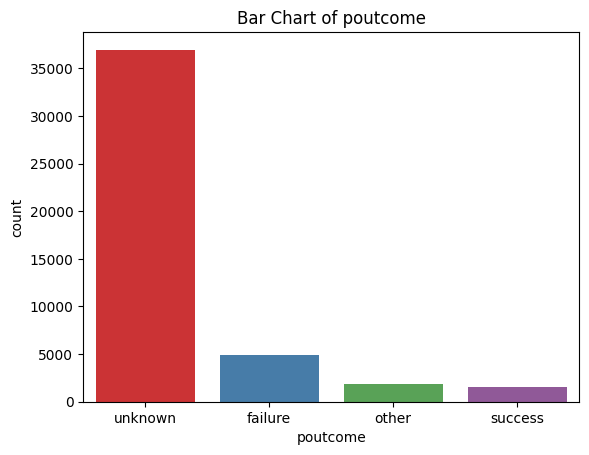

In [ ]:
for col in TGP1.select_dtypes(include='object').columns:
  print()
  sns.countplot(data=TGP1, x=TGP1[col], palette='Set1')
  plt.title(f"Bar Chart of {col}")
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

######**Histogram untuk bulan terakhir klien dihubungi**

Setelah melakukan beberapa eksplorasi didapatkan bahwa pemilihan terbaik untuk visualisasi Day dan Month adalah menggunakan Histogram oleh karena itu perlu dilakukan perubahan tipe data terlebih dahulu

Perubahan data menggunakan praproses data

In [ ]:
TGP1['month'] = TGP1 ['month'].astype('category')
TGP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  object  
 4   default    45211 non-null  bool    
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  bool    
 7   loan       45211 non-null  bool    
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  subscribe  45211 non-null  bool    
dtypes: bool(4), category(1), int64(7), object(5)
memory usage: 4.4+ MB


In [ ]:
TGP1_encoded = TGP1
TGP1_encoded['month'] = TGP1_encoded['month'].cat.codes
TGP1_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,False,2143,True,False,unknown,5,8,261,1,-1,0,unknown,False
1,44,technician,single,secondary,False,29,True,False,unknown,5,8,151,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,5,8,76,1,-1,0,unknown,False
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,5,8,92,1,-1,0,unknown,False
4,33,unknown,single,unknown,False,1,False,False,unknown,5,8,198,1,-1,0,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,False,825,False,False,cellular,17,9,977,3,-1,0,unknown,True
45207,71,retired,divorced,primary,False,1729,False,False,cellular,17,9,456,2,-1,0,unknown,True
45208,72,retired,married,secondary,False,5715,False,False,cellular,17,9,1127,5,184,3,success,True
45209,57,blue-collar,married,secondary,False,668,False,False,telephone,17,9,508,4,-1,0,unknown,False


Text(0, 0.5, 'Count')

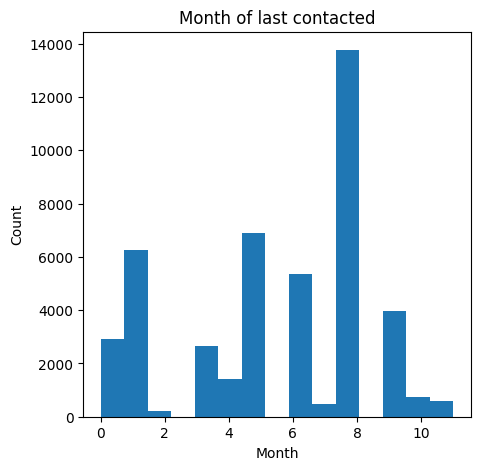

In [ ]:
plt.figure(figsize = (5, 5))  # Ukuran gambar
plt.hist(TGP1["month"], bins=15)  # Data yang ingin divisualisasikan
plt.title("Month of last contacted")  # Judul visualisasi
plt.xlabel("Month")  # Label sumbu x
plt.ylabel("Count")  # Label sumbu y

###**Analisis Bivariate**

####**Scatter Matrix**

In [ ]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(TGP1, figsize = (15,15))
# plt.show()

####**Scatter Plot untuk semua kolom**

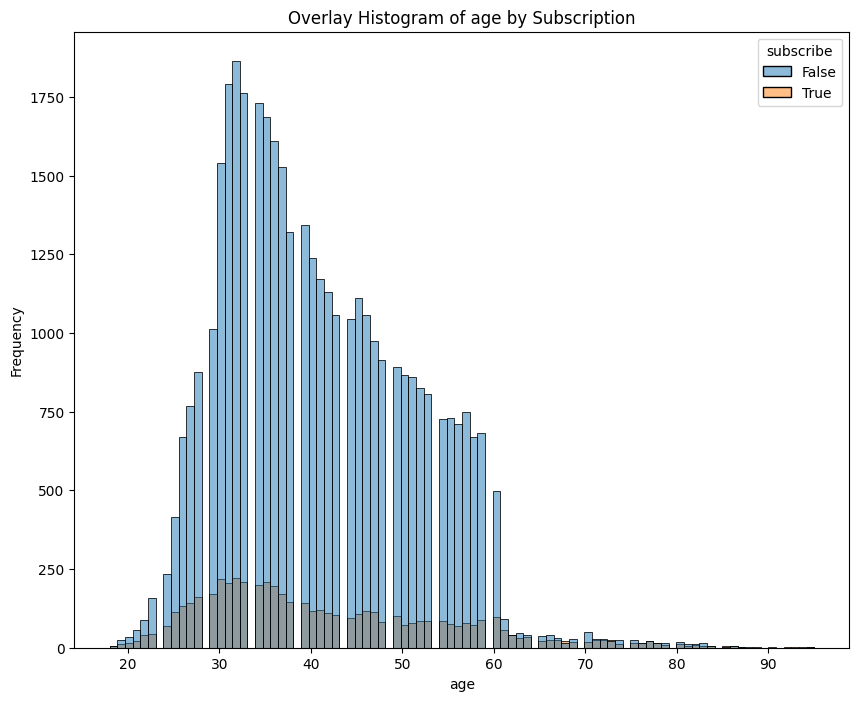

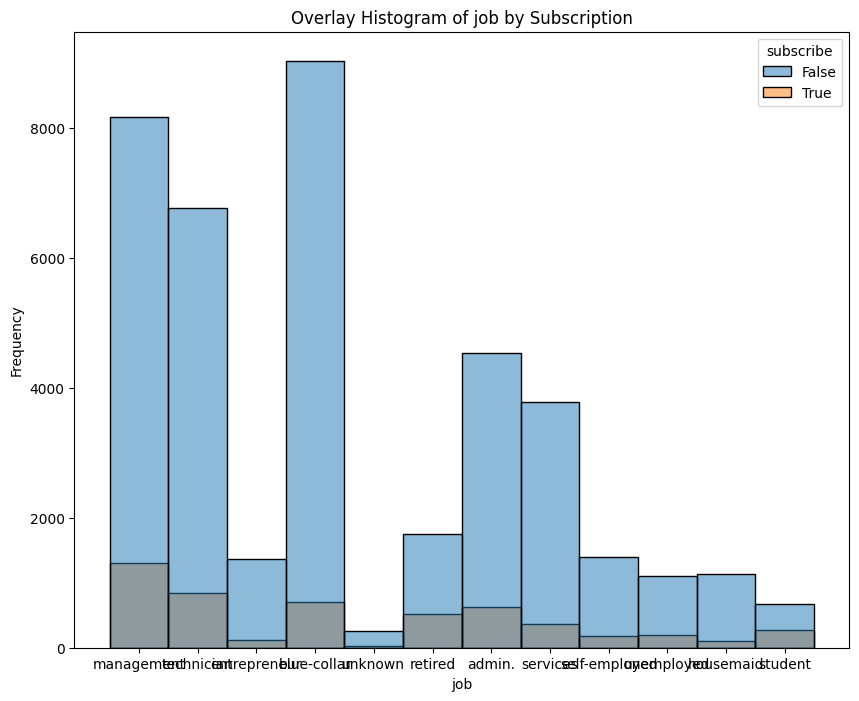

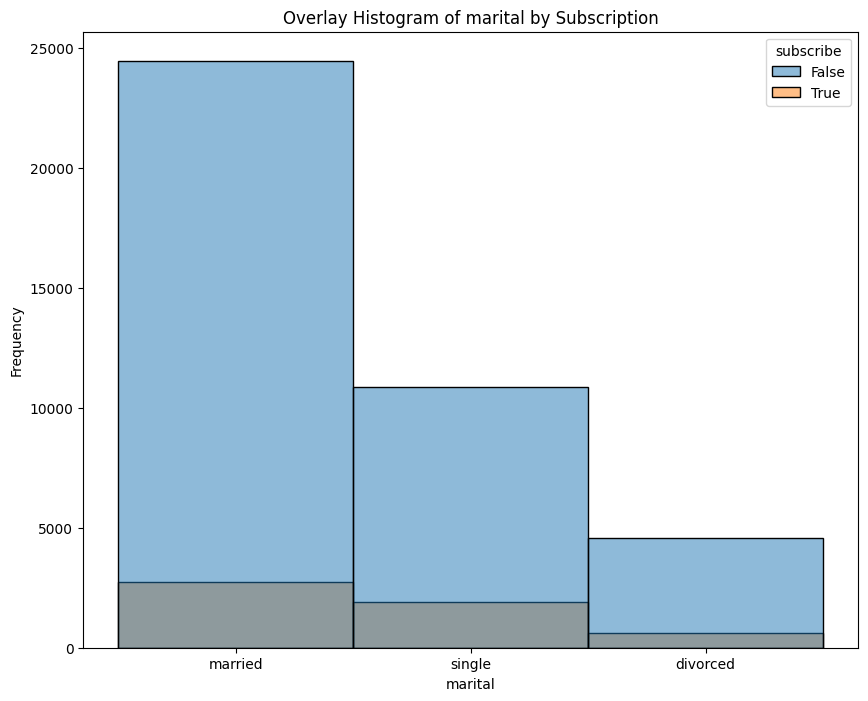

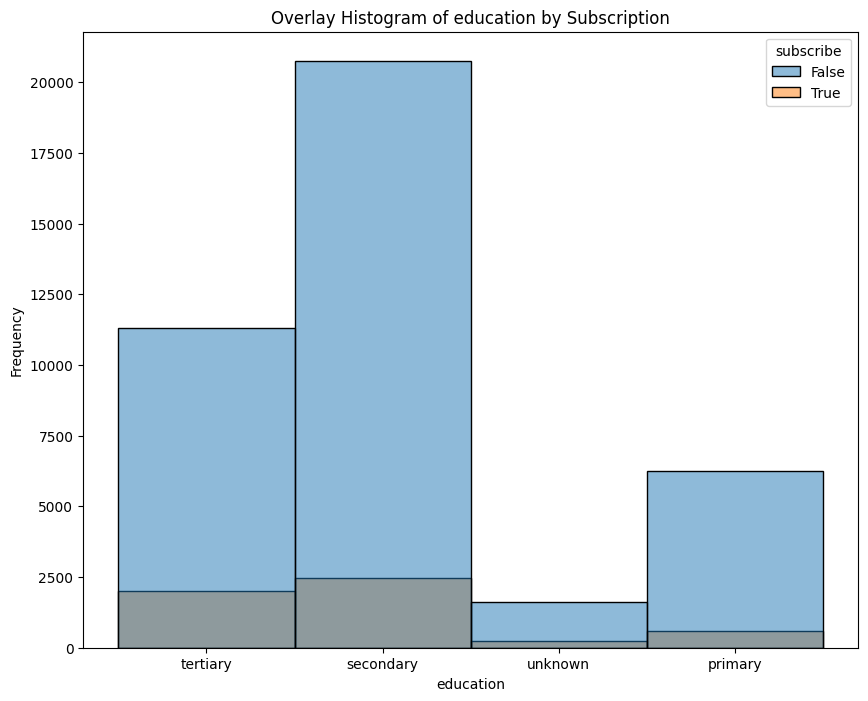

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


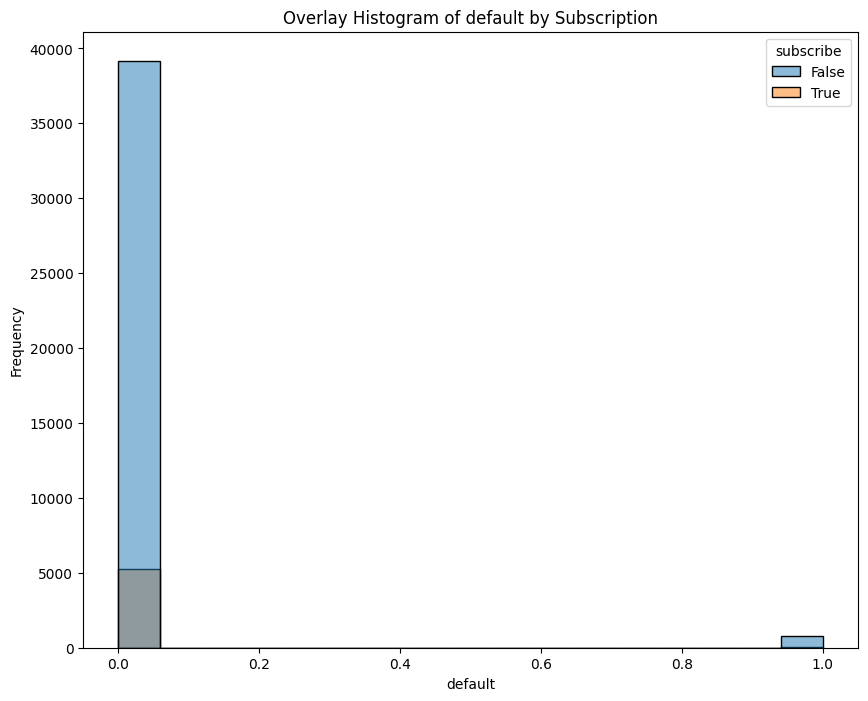

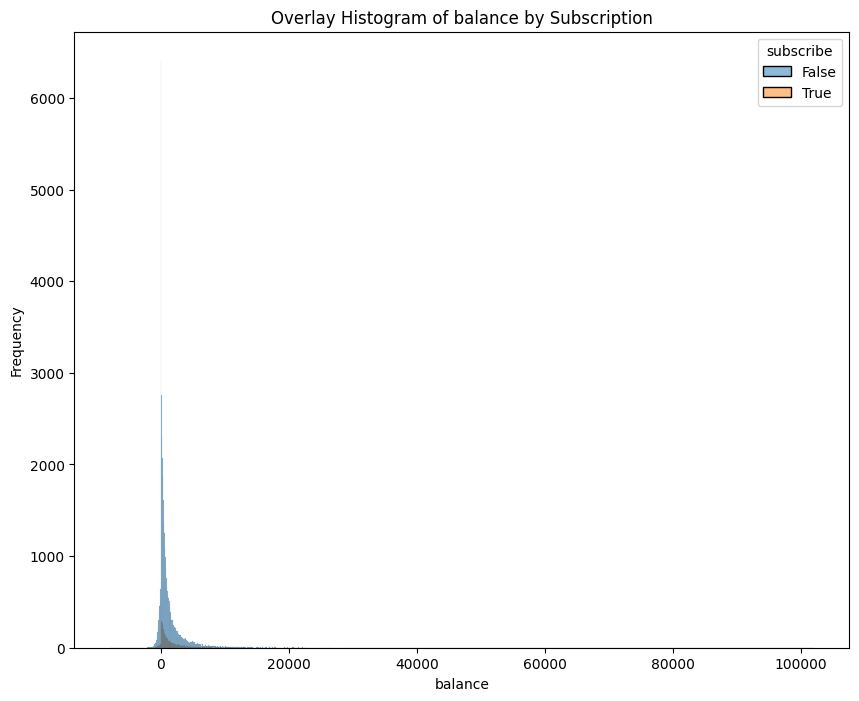

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


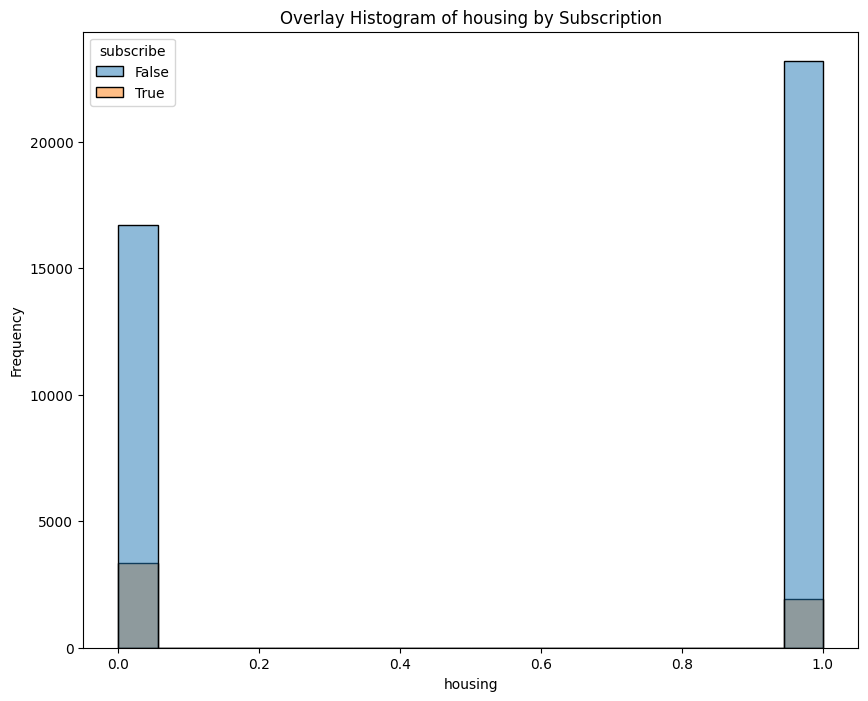

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


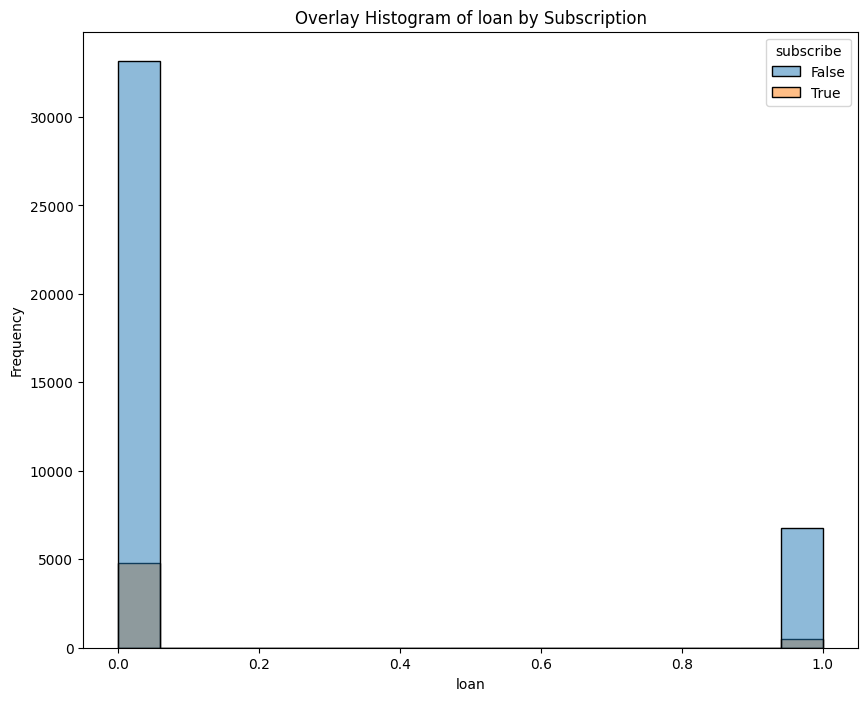

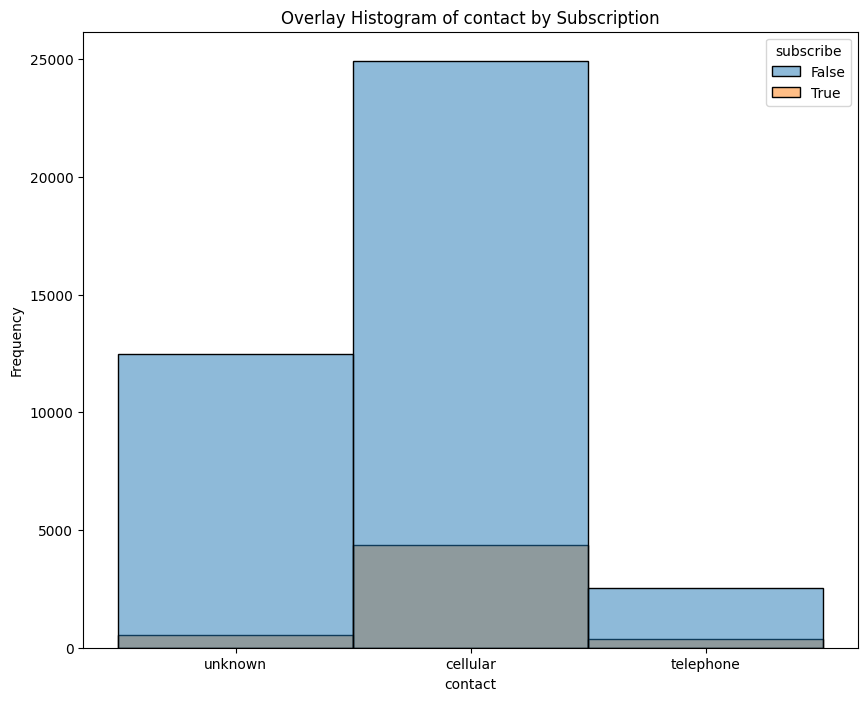

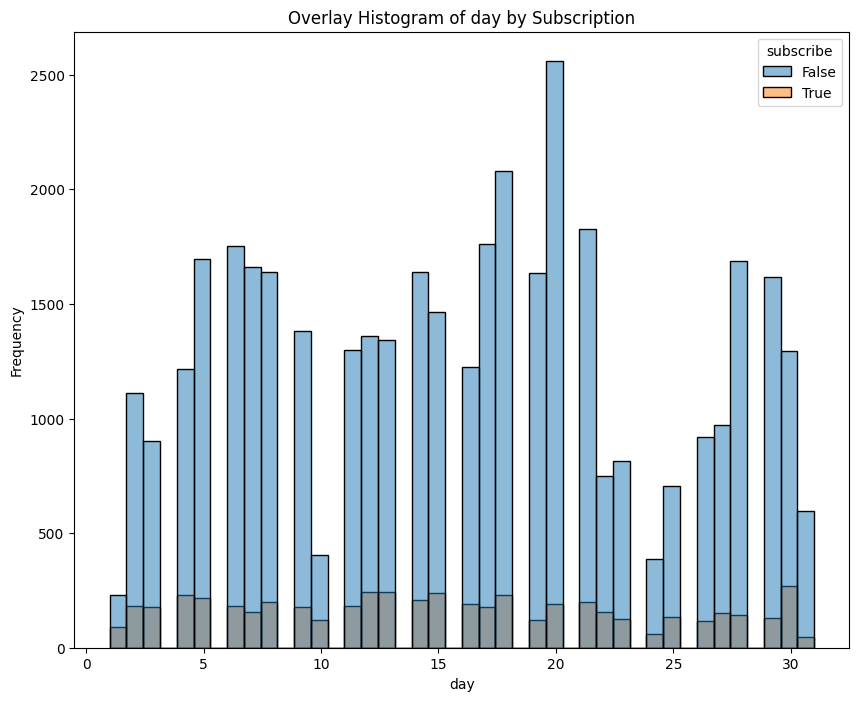

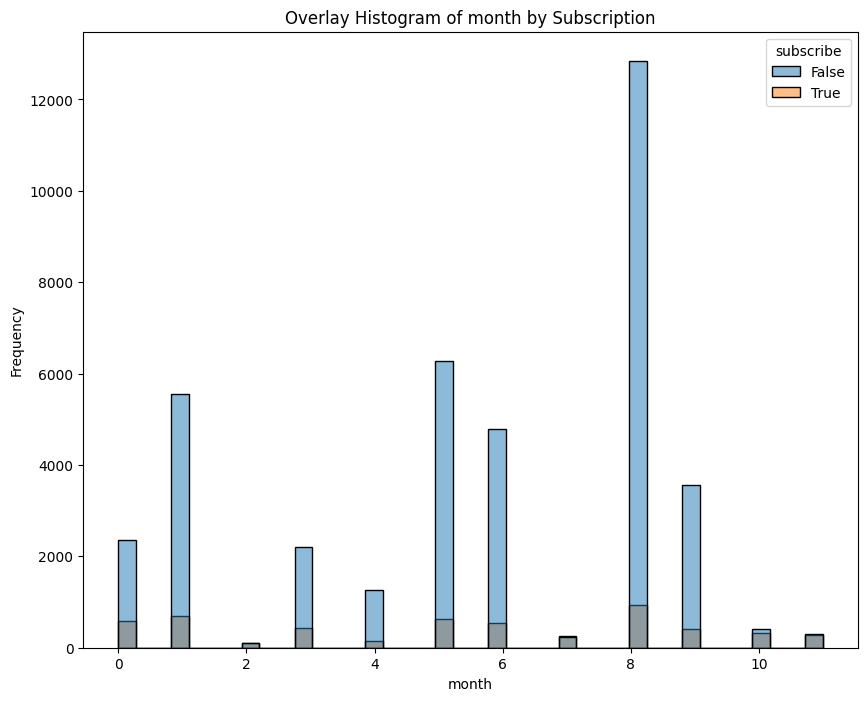

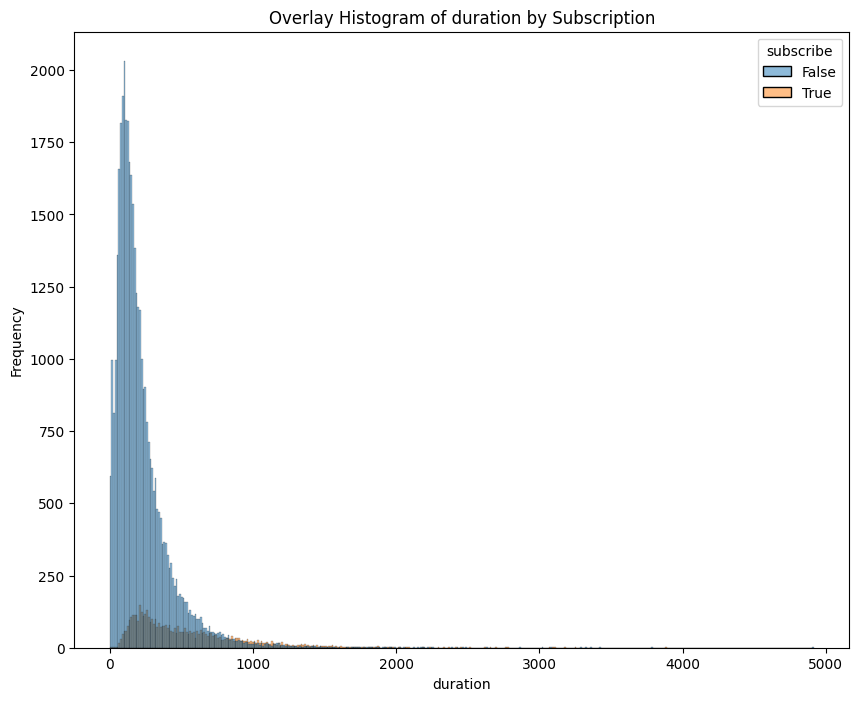

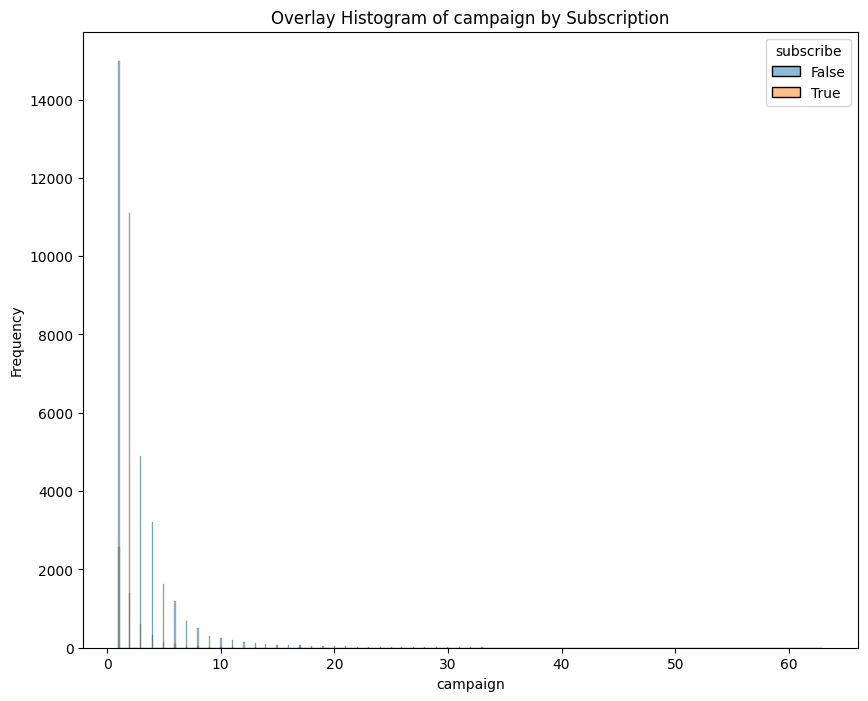

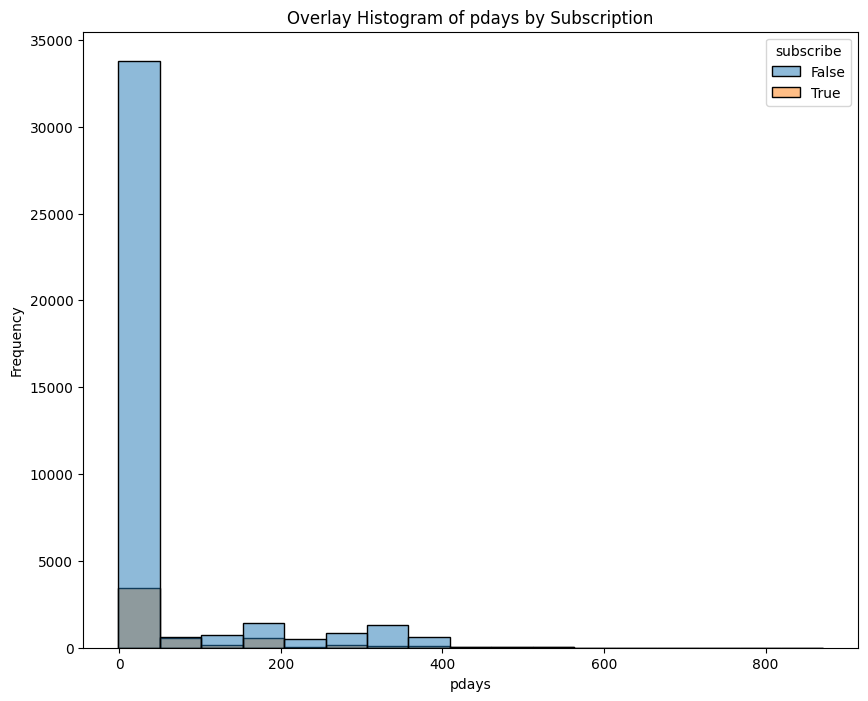

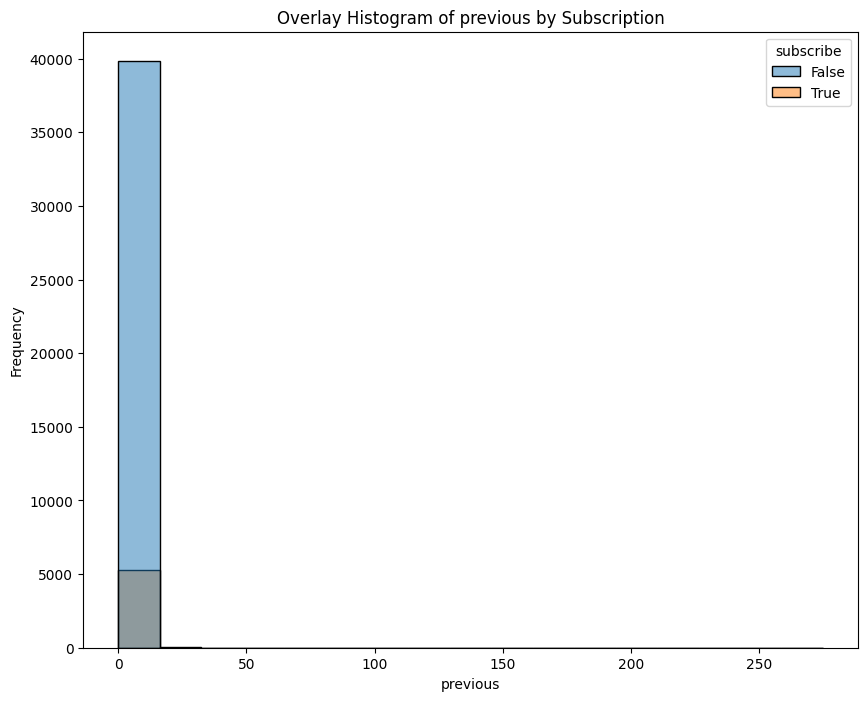

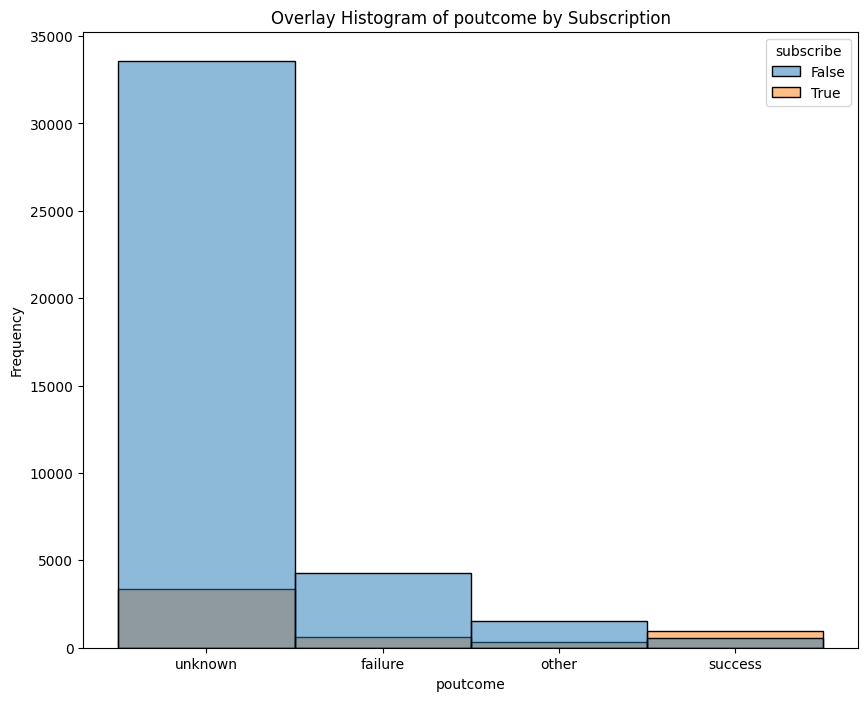

In [ ]:
target_column = 'subscribe'
col_plot = [col for col in TGP1.columns if col != target_column]
for column in col_plot:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=TGP1, x=column, hue=target_column,  common_norm=False)
    plt.title(f'Overlay Histogram of {column} by Subscription')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

####**Correlation ipada Raw Data**

# TGP2

######**Data Balancing**

In [ ]:
TGP1_cleaned['subscribe'].value_counts()

0    15589
1      648
Name: subscribe, dtype: int64

In [ ]:
X = TGP1_cleaned.drop('subscribe', axis=1)
y = TGP1_cleaned['subscribe']

In [ ]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

0    15589
1    15589
Name: subscribe, dtype: int64

###### **Data Splitting**

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=123, stratify=y_balanced)

######**Feature Scaling**

In [ ]:
X_balanced.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,31178.000000,31178.000000,31178.000000,31178.000000,31178.000000,31178.000000,31178.00000,31178.000000,31178.000000,31178.000000,31178.000000,31178.000000,31178.000000,31178.000000,31178.000000,31178.000000
mean,21.055744,4.401116,1.156424,1.365322,0.014979,1524.749310,0.45763,0.127975,0.491821,13.910225,5.281705,225.881070,0.885496,9.019341,0.146289,2.831388
std,5.957551,3.375010,0.607871,0.711594,0.121469,649.230662,0.49821,0.334067,0.832481,8.734390,3.254003,119.249364,1.091909,27.766827,0.461487,0.571663
min,13.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.00000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,1.000000,0.000000,1004.000000,0.00000,0.000000,0.000000,6.000000,3.000000,130.000000,0.000000,0.000000,0.000000,3.000000
50%,20.000000,4.000000,1.000000,1.000000,0.000000,1307.500000,0.00000,0.000000,0.000000,13.000000,6.000000,208.000000,1.000000,0.000000,0.000000,3.000000
75%,26.000000,7.000000,2.000000,2.000000,0.000000,1908.000000,1.00000,0.000000,1.000000,20.000000,8.000000,314.000000,1.000000,0.000000,0.000000,3.000000
max,33.000000,11.000000,2.000000,3.000000,1.000000,3426.000000,1.00000,1.000000,2.000000,30.000000,11.000000,494.000000,4.000000,137.000000,2.000000,3.000000


In [ ]:
scaler = StandardScaler()

X_train['age'] = scaler.fit_transform(X_train[['age']]) # "fit" on the TRAIN set only, then transform
X_test['age'] = scaler.transform(X_test[['age']]) # while on the TEST set, just "transform" it

X_train['balance'] = scaler.fit_transform(X_train[['balance']])
X_test['balance'] = scaler.transform(X_test[['balance']])

X_train['duration'] = scaler.fit_transform(X_train[['duration']])
X_test['duration'] = scaler.transform(X_test[['duration']])

X_train['pdays'] = scaler.fit_transform(X_train[['pdays']])
X_test['pdays'] = scaler.transform(X_test[['pdays']])

X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,2.182400e+04,21824.000000,21824.000000,21824.000000,21824.000000,2.182400e+04,21824.000000,21824.000000,21824.000000,21824.000000,21824.000000,2.182400e+04,21824.000000,2.182400e+04,21824.000000,21824.000000
mean,1.074409e-17,4.414544,1.156204,1.367394,0.014938,-9.767358e-18,0.457890,0.127612,0.490652,13.877703,5.287665,5.860415e-17,0.877703,-9.767358e-19,0.147544,2.829866
std,1.000023e+00,3.378861,0.605406,0.711717,0.121306,1.000023e+00,0.498235,0.333665,0.831440,8.714982,3.259029,1.000023e+00,1.083944,1.000023e+00,0.464420,0.575321
min,-1.362720e+00,0.000000,0.000000,0.000000,0.000000,-1.578578e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230e+00,0.000000,-3.255271e-01,0.000000,0.000000
25%,-8.578621e-01,1.000000,1.000000,1.000000,0.000000,-8.032558e-01,0.000000,0.000000,0.000000,6.000000,3.000000,-7.994268e-01,0.000000,-3.255271e-01,0.000000,3.000000
50%,-1.847182e-01,4.000000,1.000000,1.000000,0.000000,-3.365272e-01,0.000000,0.000000,0.000000,13.000000,6.000000,-1.514194e-01,1.000000,-3.255271e-01,0.000000,3.000000
75%,8.249976e-01,7.000000,2.000000,2.000000,0.000000,5.861830e-01,1.000000,0.000000,1.000000,20.000000,8.000000,7.490585e-01,1.000000,-3.255271e-01,0.000000,3.000000
max,2.002999e+00,11.000000,2.000000,3.000000,1.000000,2.909079e+00,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465e+00,4.000000,4.588364e+00,2.000000,3.000000


####**Preparation**

In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
# Pengelompokan fitur
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Transformers untuk preprocessing
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'))
binary_transformer = make_pipeline(OneHotEncoder(drop='if_binary'))

# Preprocessor
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features))

####**Model Klasifikasi**


######**Decision Tree**

Mencari parameter terbaik. Parameter penting dalam Decision Tree adalah kedalaman pohon (max_depth), jumlah sampel minimum yang diperlukan untuk membagi node (min_samples_split), jumlah sampel minimum yang diperlukan di leaf node (min_samples_leaf), dan lainnya.

In [ ]:
# Membuat model Decision Tree
dtree = DecisionTreeClassifier()

# Membuat grid parameter yang akan diuji
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian parameter terbaik pada data latih
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


**10-CROSS VALIDATION**

In [37]:
# Inisialisasi model Decision Tree dengan parameter yang disebutkan
dtree = DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=10)

# Pipeline untuk model Decision Tree
dtree_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', dtree)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(dtree_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

Hasil Validasi Silang (Akurasi):
[0.9544335  0.9544335  0.95997537 0.94889163 0.95935961 0.95874384
 0.95135468 0.96179914 0.95440542 0.95748614]
Rata-rata Akurasi: 0.956088281446813


Mencari kfold terbaik sebagai model terbaik, digabung dalam validasi di bawah karena hasil akan berbeda sesuai dengan data splitting yang ada maka dari itu dibuat variabel best_kfold

In [38]:
# Membuat DataFrame untuk menyimpan hasil validasi silang
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_dtree = 0

# Melakukan validasi silang dengan Decision Tree
for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fitting model Decision Tree
    dtree_pipe.fit(train_features, train_labels)
    pred_labels = dtree_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_dtree = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_dtree}")

F1-score for fold 1:  0.9767441860465117
ROC-AUC score for fold 1:  0.9761686526122823
Summary Score for 1:  1.952912838658794 

F1-score for fold 2:  0.9815730337078651
ROC-AUC score for fold 2:  0.9812098991750687
Summary Score for 2:  1.9627829328829338 

F1-score for fold 3:  0.9797934440951953
ROC-AUC score for fold 3:  0.9793956043956045
Summary Score for 3:  1.9591890484907997 

F1-score for fold 4:  0.9797934440951953
ROC-AUC score for fold 4:  0.9793956043956045
Summary Score for 4:  1.9591890484907997 

F1-score for fold 5:  0.97847533632287
ROC-AUC score for fold 5:  0.9780018331805682
Summary Score for 5:  1.9564771695034382 

F1-score for fold 6:  0.9806741573033707
ROC-AUC score for fold 6:  0.9802933088909257
Summary Score for 6:  1.9609674661942964 

F1-score for fold 7:  0.9689165186500888
ROC-AUC score for fold 7:  0.9679193400549955
Summary Score for 7:  1.9368358587050842 

F1-score for fold 8:  0.9833258224425417
ROC-AUC score for fold 8:  0.9830430797433547
Summar

In [ ]:
kfold_set

,train,val
1,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[8, 41, 61, 64, 74, 77, 83, 86, 94, 96, 101, 1..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[13, 23, 27, 39, 42, 46, 59, 78, 113, 139, 147..."
3,"[0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[3, 5, 12, 25, 36, 54, 55, 63, 73, 80, 119, 12..."
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16,...","[10, 11, 14, 22, 29, 32, 45, 57, 65, 76, 79, 8..."
5,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[7, 17, 28, 31, 33, 35, 43, 52, 70, 103, 120, ..."
6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[19, 30, 37, 44, 49, 58, 62, 69, 81, 98, 102, ..."
7,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...","[6, 9, 21, 40, 47, 53, 90, 92, 93, 95, 107, 10..."
8,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 1, 16, 24, 48, 67, 72, 75, 82, 85, 87, 89,..."
9,"[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[2, 4, 18, 20, 26, 34, 50, 51, 56, 60, 66, 68,..."
10,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[15, 38, 91, 112, 127, 140, 164, 170, 172, 174..."


In [40]:
kfold_set.loc[best_kfold_dtree]

train    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
val      [0, 1, 16, 24, 48, 67, 72, 75, 82, 85, 87, 89,...
Name: 8, dtype: object

In [41]:
X_train.iloc[kfold_set['train'].loc[best_kfold_dtree]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,0.001586,4.414673,1.153752,1.366511,0.014968,-0.000444,0.459424,0.127380,0.492872,13.895734,5.280165,-0.002521,0.879900,-0.002452,0.146828,2.830567
std,1.000254,3.378590,0.605276,0.712343,0.121427,0.999990,0.498364,0.333407,0.832659,8.715679,3.256707,1.000883,1.084526,0.997000,0.463666,0.574660
min,-1.362720,0.000000,0.000000,0.000000,0.000000,-1.578578,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230,0.000000,-0.325527,0.000000,0.000000
25%,-0.857862,1.000000,1.000000,1.000000,0.000000,-0.804791,0.000000,0.000000,0.000000,6.000000,3.000000,-0.807843,0.000000,-0.325527,0.000000,3.000000
50%,-0.184718,4.000000,1.000000,1.000000,0.000000,-0.338062,0.000000,0.000000,0.000000,13.000000,6.000000,-0.151419,1.000000,-0.325527,0.000000,3.000000
75%,0.824998,7.000000,2.000000,2.000000,0.000000,0.587718,1.000000,0.000000,1.000000,20.000000,8.000000,0.740643,1.000000,-0.325527,0.000000,3.000000
max,2.002999,11.000000,2.000000,3.000000,1.000000,2.909079,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465,4.000000,4.588364,2.000000,3.000000


In [39]:
X_fold_best_dtree = X_train.iloc[kfold_set['train'].loc[best_kfold_dtree]]
y_fold_best_dtree = y_train.iloc[kfold_set['train'].loc[best_kfold_dtree]]
dtree = DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=10, splitter="best")
dtree.fit(X_fold_best_dtree, y_fold_best_dtree)
y_pred = dtree.predict(X_test)
f1_score_dtree = f1_score(y_test, y_pred)
roc_auc_dtree = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_dtree}")
print(f"ROC-AUC Score: {roc_auc_dtree}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.9789638932496075
ROC-AUC Score: 0.9785118665811418

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      4677
           1       0.96      1.00      0.98      4677

    accuracy                           0.98      9354
   macro avg       0.98      0.98      0.98      9354
weighted avg       0.98      0.98      0.98      9354



######**K-Nearest Neighbor**

Mencari Parameter Terbaik menggunakan Grid Search. Parameter yang digunakan adalah n_neighbors, weight, dan p.

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)
print("Parameter terbaik:", grid_search.best_params_)
print("Skor validasi terbaik:", grid_search.best_score_)

Parameter terbaik: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Skor validasi terbaik: 0.9595984205200405



**10 cross validation**

In [ ]:
# Inisialisasi model logistic Regression dengan parameter yang disebutkan
knn = KNeighborsClassifier(n_neighbors=9, weights="uniform", p=1)

# Pipeline untuk model Regresi Logistik
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', knn)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(knn_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

Hasil Validasi Silang (Akurasi):
[0.96059113 0.95935961 0.96059113 0.96305419 0.96428571 0.96059113
 0.95566502 0.96303142 0.96426371 0.95871842]
Rata-rata Akurasi: 0.9610151486179277


Mencari kfold terbaik sebagai model terbaik, digabung dalam validasi di bawah karena hasil akan berbeda sesuai dengan data splitting yang ada maka dari itu dibuat variabel best_kfold

In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_knn = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Pipeline untuk model Random Forest
    knn_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', knn)
    ])

    knn_pipe.fit(train_features, train_labels)
    pred_labels = knn_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_knn = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_knn}")

F1-score for fold 1:  0.9491525423728813
ROC-AUC score for fold 1:  0.9463794683776352
Summary Score for 1:  1.8955320107505165 

F1-score for fold 2:  0.9503916449086162
ROC-AUC score for fold 2:  0.9477543538038498
Summary Score for 2:  1.898145998712466 

F1-score for fold 3:  0.9515918011338856
ROC-AUC score for fold 3:  0.9491758241758242
Summary Score for 3:  1.9007676253097099 

F1-score for fold 4:  0.9491083079599826
ROC-AUC score for fold 4:  0.9464285714285715
Summary Score for 4:  1.895536879388554 

F1-score for fold 5:  0.948695652173913
ROC-AUC score for fold 5:  0.9459211732355637
Summary Score for 5:  1.8946168254094768 

F1-score for fold 6:  0.9454072790294628
ROC-AUC score for fold 6:  0.9422548120989918
Summary Score for 6:  1.8876620911284545 

F1-score for fold 7:  0.9445887445887446
ROC-AUC score for fold 7:  0.9413382218148488
Summary Score for 7:  1.8859269664035936 

F1-score for fold 8:  0.9515918011338856
ROC-AUC score for fold 8:  0.9491292392300641
Summar

In [ ]:
kfold_set.loc[best_kfold_knn]

train    [0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...
val      [3, 5, 12, 25, 36, 54, 55, 63, 73, 80, 119, 12...
Name: 3, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_knn]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000
mean,-0.001489,4.415356,1.157680,1.369482,0.014816,-0.003496,0.457461,0.128609,0.489843,13.897154,5.298814,0.003680,0.876788,0.000722,0.148007,2.829642
std,0.999960,3.379505,0.605334,0.712189,0.120819,0.998640,0.498200,0.334775,0.830927,8.718745,3.255586,1.001108,1.085214,1.001556,0.465442,0.575819
min,-1.362720,0.000000,0.000000,0.000000,0.000000,-1.578578,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230,0.000000,-0.325527,0.000000,0.000000
25%,-0.857862,1.000000,1.000000,1.000000,0.000000,-0.804791,0.000000,0.000000,0.000000,6.000000,3.000000,-0.791011,0.000000,-0.325527,0.000000,3.000000
50%,-0.184718,4.000000,1.000000,1.000000,0.000000,-0.344204,0.000000,0.000000,0.000000,13.000000,6.000000,-0.151419,1.000000,-0.325527,0.000000,3.000000
75%,0.824998,7.000000,2.000000,2.000000,0.000000,0.583112,1.000000,0.000000,1.000000,20.000000,8.000000,0.749058,1.000000,-0.325527,0.000000,3.000000
max,2.002999,11.000000,2.000000,3.000000,1.000000,2.906008,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465,4.000000,4.588364,2.000000,3.000000


In [ ]:
X_fold_best_knn = X_train.iloc[kfold_set['train'].loc[best_kfold_knn]]
y_fold_best_knn = y_train.iloc[kfold_set['train'].loc[best_kfold_knn]]
knn = KNeighborsClassifier(n_neighbors=9, p=1, weights="uniform")
knn.fit(X_fold_best_knn, y_fold_best_knn)
y_pred = knn.predict(X_test)
f1_score_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_knn}")
print(f"ROC-AUC Score: {roc_auc_knn}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.9492591840876801
ROC-AUC Score: 0.9465469317938849

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      4677
           1       0.90      1.00      0.95      4677

    accuracy                           0.95      9354
   macro avg       0.95      0.95      0.95      9354
weighted avg       0.95      0.95      0.95      9354



######**Naive Bayes**

Cari parameter terbaik pada Naive Bayes menggunakan Grid Search dengan parameter yang akan digunakan adalah var_smoothing serta priors

In [ ]:
# Tentukan model Naive Bayes
nb = GaussianNB()

# Tentukan parameter-parameter yang akan diuji dalam pencarian parameter
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4],  # Tambahkan variasi nilai var_smoothing
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2], [0.3, 0.7]]  # Tambahkan variasi nilai probabilitas prior
}


# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Cetak parameter terbaik dan skor validasi silang terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Skor validasi silang terbaik:", grid_search.best_score_)

Parameter terbaik: {'priors': None, 'var_smoothing': 0.0001}
Skor validasi silang terbaik: 0.9490037601969836


Mencari kfold terbaik sebagai model terbaik, digabung dalam validasi di bawah karena hasil akan berbeda sesuai dengan data splitting yang ada maka dari itu dibuat variabel best_kfold

In [ ]:
# Inisialisasi model Naive Bayes dengan parameter yang disebutkan
nbc = GaussianNB(var_smoothing= 1e-05, priors= None )

# Pipeline untuk model Naive Bayes
nbc_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', nbc)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(nbc_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

Hasil Validasi Silang (Akurasi):
[0.94519704 0.94458128 0.94950739 0.9408867  0.94458128 0.95073892
 0.94027094 0.95009242 0.95255699 0.94516328]
Rata-rata Akurasi: 0.94635762393427


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_nbc = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Pipeline untuk model Random Forest
    nbc = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', nbc)
    ])

    nbc_pipe.fit(train_features, train_labels)
    pred_labels = nbc_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_nbc = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_nbc}")

F1-score for fold 1:  0.5488257107540173
ROC-AUC score for fold 1:  0.6657165016468407
Summary Score for 1:  1.214542212400858 

F1-score for fold 2:  0.5719512195121951
ROC-AUC score for fold 2:  0.6785382735199418
Summary Score for 2:  1.2504894930321369 

F1-score for fold 3:  0.5705521472392637
ROC-AUC score for fold 3:  0.6792244571804609
Summary Score for 3:  1.2497766044197247 

F1-score for fold 4:  0.5953654188948306
ROC-AUC score for fold 4:  0.6879391995111518
Summary Score for 4:  1.2833046184059824 

F1-score for fold 5:  0.5989176187612749
ROC-AUC score for fold 5:  0.6943171402383135
Summary Score for 5:  1.2932347589995885 

F1-score for fold 6:  0.5778045838359469
ROC-AUC score for fold 6:  0.6791934005499541
Summary Score for 6:  1.256997984385901 

F1-score for fold 7:  0.5741974560872198
ROC-AUC score for fold 7:  0.6778185151237397
Summary Score for 7:  1.2520159712109595 

F1-score for fold 8:  0.605294825511432
ROC-AUC score for fold 8:  0.6993583868010999
Summar

In [ ]:
kfold_set.loc[best_kfold_nbc]

train    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
val      [0, 1, 16, 24, 48, 67, 72, 75, 82, 85, 87, 89,...
Name: 8, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_nbc]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,0.001586,4.414673,1.153752,1.366511,0.014968,-0.000444,0.459424,0.127380,0.492872,13.895734,5.280165,-0.002521,0.879900,-0.002452,0.146828,2.830567
std,1.000254,3.378590,0.605276,0.712343,0.121427,0.999990,0.498364,0.333407,0.832659,8.715679,3.256707,1.000883,1.084526,0.997000,0.463666,0.574660
min,-1.362720,0.000000,0.000000,0.000000,0.000000,-1.578578,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230,0.000000,-0.325527,0.000000,0.000000
25%,-0.857862,1.000000,1.000000,1.000000,0.000000,-0.804791,0.000000,0.000000,0.000000,6.000000,3.000000,-0.807843,0.000000,-0.325527,0.000000,3.000000
50%,-0.184718,4.000000,1.000000,1.000000,0.000000,-0.338062,0.000000,0.000000,0.000000,13.000000,6.000000,-0.151419,1.000000,-0.325527,0.000000,3.000000
75%,0.824998,7.000000,2.000000,2.000000,0.000000,0.587718,1.000000,0.000000,1.000000,20.000000,8.000000,0.740643,1.000000,-0.325527,0.000000,3.000000
max,2.002999,11.000000,2.000000,3.000000,1.000000,2.909079,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465,4.000000,4.588364,2.000000,3.000000


In [ ]:
X_fold_best_nbc = X_train.iloc[kfold_set['train'].loc[best_kfold_nbc]]
y_fold_best_nbc = y_train.iloc[kfold_set['train'].loc[best_kfold_nbc]]
nbc = GaussianNB(var_smoothing= 1e-05, priors=None)
nbc.fit(X_fold_best_nbc, y_fold_best_nbc)
y_pred = nbc.predict(X_test)
f1_score_nbc = f1_score(y_test, y_pred)
roc_auc_nbc = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_nbc}")
print(f"ROC-AUC Score: {roc_auc_nbc}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.572642310960068
ROC-AUC Score: 0.6773572803078897

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.92      0.74      4677
           1       0.85      0.43      0.57      4677

    accuracy                           0.68      9354
   macro avg       0.73      0.68      0.66      9354
weighted avg       0.73      0.68      0.66      9354



######**Support Vector Machine**

Cari parameter terbaik pada Support Vector Machine menggunakan Grid Search dengan parameter yang akan digunakan adalah C dan dual=False

In [ ]:
svc = LinearSVC()
param_grid = {'C': [0.1, 1, 10, 100], 'dual': [False]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
print("Parameter terbaik:", grid_search.best_params_)
print("Skor validasi terbaik:", grid_search.best_score_)

Parameter terbaik: {'C': 10, 'dual': False}
Skor validasi terbaik: 0.7745602623989047


Pembuatan Pipeline menggunakan StratifiedKfold atau skf untuk melakukan pengecekan hasil cross validation

In [ ]:
svm = LinearSVC(C=100, dual=False)

# Pipeline untuk model Naive Bayes
svm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', svm)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(svm_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

Hasil Validasi Silang (Akurasi):
[0.95935961 0.96059113 0.9612069  0.95874384 0.95997537 0.96366995
 0.96182266 0.96303142 0.96179914 0.95871842]
Rata-rata Akurasi: 0.960891844149222


Melakukan pengecekan setiap fold yang ada pada pipeline dan menentukan fold terbaik dengan penggabungan dua score yaitu F1-Score dan roc_auc dan memasukkannya ke dalam variabel best_kfold karena hasil akan berbeda sesuai dengan data splitting

In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_svm = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Pipeline untuk model Random Forest
    svm = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', svm)
    ])

    svm_pipe.fit(train_features, train_labels)
    pred_labels = svm_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_svm = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_svm}")

F1-score for fold 1:  0.7772727272727272
ROC-AUC score for fold 1:  0.7755348455394284
Summary Score for 1:  1.5528075728121555 

F1-score for fold 2:  0.7689480937069363
ROC-AUC score for fold 2:  0.7695845630080277
Summary Score for 2:  1.538532656714964 

F1-score for fold 3:  0.7726651480637814
ROC-AUC score for fold 3:  0.7714181632605097
Summary Score for 3:  1.544083311324291 

F1-score for fold 4:  0.7774798927613941
ROC-AUC score for fold 4:  0.771885271770698
Summary Score for 4:  1.549365164532092 

F1-score for fold 5:  0.7789954337899544
ROC-AUC score for fold 5:  0.7781851512373968
Summary Score for 5:  1.5571805850273512 

F1-score for fold 6:  0.768814781433078
ROC-AUC score for fold 6:  0.7648945921173236
Summary Score for 6:  1.5337093735504017 

F1-score for fold 7:  0.7652645861601085
ROC-AUC score for fold 7:  0.7621448212648946
Summary Score for 7:  1.527409407425003 

F1-score for fold 8:  0.7959001782531194
ROC-AUC score for fold 8:  0.7901008249312557
Summary S

Kfold terbaik

In [ ]:
kfold_set.loc[best_kfold_svm]

train    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
val      [0, 1, 16, 24, 48, 67, 72, 75, 82, 85, 87, 89,...
Name: 8, dtype: object

Deskripsi dari Kfold terbaik pada metode klasifikasi yang berisi std dan mean dari data kfold

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_svm]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,0.001586,4.414673,1.153752,1.366511,0.014968,-0.000444,0.459424,0.127380,0.492872,13.895734,5.280165,-0.002521,0.879900,-0.002452,0.146828,2.830567
std,1.000254,3.378590,0.605276,0.712343,0.121427,0.999990,0.498364,0.333407,0.832659,8.715679,3.256707,1.000883,1.084526,0.997000,0.463666,0.574660
min,-1.362720,0.000000,0.000000,0.000000,0.000000,-1.578578,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230,0.000000,-0.325527,0.000000,0.000000
25%,-0.857862,1.000000,1.000000,1.000000,0.000000,-0.804791,0.000000,0.000000,0.000000,6.000000,3.000000,-0.807843,0.000000,-0.325527,0.000000,3.000000
50%,-0.184718,4.000000,1.000000,1.000000,0.000000,-0.338062,0.000000,0.000000,0.000000,13.000000,6.000000,-0.151419,1.000000,-0.325527,0.000000,3.000000
75%,0.824998,7.000000,2.000000,2.000000,0.000000,0.587718,1.000000,0.000000,1.000000,20.000000,8.000000,0.740643,1.000000,-0.325527,0.000000,3.000000
max,2.002999,11.000000,2.000000,3.000000,1.000000,2.909079,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465,4.000000,4.588364,2.000000,3.000000


Melakukan pengecekan model terbaik (kfold terbaik) dengan data test

In [ ]:
X_fold_best_svm = X_train.iloc[kfold_set['train'].loc[best_kfold_svm]]
y_fold_best_svm = y_train.iloc[kfold_set['train'].loc[best_kfold_svm]]
svm = LinearSVC(C=10, dual=False)
svm.fit(X_fold_best_svm, y_fold_best_svm)
y_pred = svm.predict(X_test)
f1_score_svm = f1_score(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_svm}")
print(f"ROC-AUC Score: {roc_auc_svm}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.7732909379968202
ROC-AUC Score: 0.7713277742142399

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      4677
           1       0.77      0.78      0.77      4677

    accuracy                           0.77      9354
   macro avg       0.77      0.77      0.77      9354
weighted avg       0.77      0.77      0.77      9354



######**Backpropagation Neural Networks**

In [ ]:
# Inisialisasi model logistic Regression dengan parameter yang disebutkan
nn = MLPClassifier(hidden_layer_sizes=(50, 100), activation="relu", solver="adam", alpha=0.0001, max_iter = 500, early_stopping= True)

# Pipeline untuk model Regresi Logistik
nn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', nn)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(nn_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

Hasil Validasi Silang (Akurasi):
[0.96243842 0.96243842 0.96243842 0.9612069  0.95997537 0.96490148
 0.95997537 0.96179914 0.96364757 0.95748614]
Rata-rata Akurasi: 0.9616307224655432


Mencari kfold terbaik sebagai model terbaik, digabung dalam validasi di bawah karena hasil akan berbeda sesuai dengan data splitting yang ada maka dari itu dibuat variabel best_kfold

In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_nn = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Pipeline untuk model Random Forest
    nn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', nn)
    ])

    nn_pipe.fit(train_features, train_labels)
    pred_labels = nn_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_nn = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_nn}")

F1-score for fold 1:  0.9424269264836139
ROC-AUC score for fold 1:  0.9404333826881949
Summary Score for 1:  1.8828603091718088 

F1-score for fold 2:  0.9615384615384616
ROC-AUC score for fold 2:  0.9605937524131842
Summary Score for 2:  1.9221322139516457 

F1-score for fold 3:  0.9583892617449665
ROC-AUC score for fold 3:  0.9574091887336617
Summary Score for 3:  1.9157984504786283 

F1-score for fold 4:  0.9684023141967066
ROC-AUC score for fold 4:  0.9674895834382543
Summary Score for 4:  1.9358918976349608 

F1-score for fold 5:  0.9665924276169265
ROC-AUC score for fold 5:  0.9656278643446381
Summary Score for 5:  1.9322202919615648 

F1-score for fold 6:  0.958831341301461
ROC-AUC score for fold 6:  0.9573785517873511
Summary Score for 6:  1.916209893088812 

F1-score for fold 7:  0.9493333333333333
ROC-AUC score for fold 7:  0.9477543538038496
Summary Score for 7:  1.897087687137183 

F1-score for fold 8:  0.9788764044943821
ROC-AUC score for fold 8:  0.9784601283226397
Summar

In [ ]:
kfold_set.loc[best_kfold_nn]

train    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
val      [0, 1, 16, 24, 48, 67, 72, 75, 82, 85, 87, 89,...
Name: 8, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_nn]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,0.001586,4.414673,1.153752,1.366511,0.014968,-0.000444,0.459424,0.127380,0.492872,13.895734,5.280165,-0.002521,0.879900,-0.002452,0.146828,2.830567
std,1.000254,3.378590,0.605276,0.712343,0.121427,0.999990,0.498364,0.333407,0.832659,8.715679,3.256707,1.000883,1.084526,0.997000,0.463666,0.574660
min,-1.362720,0.000000,0.000000,0.000000,0.000000,-1.578578,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230,0.000000,-0.325527,0.000000,0.000000
25%,-0.857862,1.000000,1.000000,1.000000,0.000000,-0.804791,0.000000,0.000000,0.000000,6.000000,3.000000,-0.807843,0.000000,-0.325527,0.000000,3.000000
50%,-0.184718,4.000000,1.000000,1.000000,0.000000,-0.338062,0.000000,0.000000,0.000000,13.000000,6.000000,-0.151419,1.000000,-0.325527,0.000000,3.000000
75%,0.824998,7.000000,2.000000,2.000000,0.000000,0.587718,1.000000,0.000000,1.000000,20.000000,8.000000,0.740643,1.000000,-0.325527,0.000000,3.000000
max,2.002999,11.000000,2.000000,3.000000,1.000000,2.909079,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465,4.000000,4.588364,2.000000,3.000000


In [ ]:
X_fold_best_nn = X_train.iloc[kfold_set['train'].loc[best_kfold_nn]]
y_fold_best_nn = y_train.iloc[kfold_set['train'].loc[best_kfold_nn]]
nn = MLPClassifier(hidden_layer_sizes=(50, 100), activation="relu", solver="adam", alpha=0.0001, max_iter = 500, early_stopping= True)
nn.fit(X_fold_best_nn, y_fold_best_nn)
y_pred = nn.predict(X_test)
f1_score_nn = f1_score(y_test, y_pred)
roc_auc_nn = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_nn}")
print(f"ROC-AUC Score: {roc_auc_nn}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.9443277310924368
ROC-AUC Score: 0.9433397477015181

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      4677
           1       0.93      0.96      0.94      4677

    accuracy                           0.94      9354
   macro avg       0.94      0.94      0.94      9354
weighted avg       0.94      0.94      0.94      9354



######**Logistic Regression**

Mencari Parameter Terbaik menggunakan Grid Search. Dilakukan Pengujian untuk memilih variasi dari parameter C dan Solver

---



In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Variasi parameter C
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga', 'newton-cholesky' ]  # Variasi solver
}

# Membuat objek model Regresi Logistik
logreg = LogisticRegression(random_state=123)

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan parameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Parameter terbaik: {'C': 0.01, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**10-Cross Validation**

In [ ]:
# Inisialisasi model logistic Regression dengan parameter yang disebutkan
logreg = LogisticRegression(C=10, solver='newton-cg')

# Pipeline untuk model Regresi Logistik
logreg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', logreg)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(logreg_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

Hasil Validasi Silang (Akurasi):
[0.96059113 0.96182266 0.96243842 0.95874384 0.9612069  0.96428571
 0.95997537 0.96426371 0.96118299 0.95625385]
Rata-rata Akurasi: 0.9610764593937517


Mencari kfold terbaik sebagai model terbaik, digabung dalam validasi di bawah karena hasil akan berbeda sesuai dengan data splitting yang ada maka dari itu dibuat variabel best_kfold

In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_logreg = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
    logreg_pipe.fit(train_features, train_labels)
    pred_labels = logreg_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_logreg = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_logreg}")

F1-score for fold 1:  0.7757520510483136
ROC-AUC score for fold 1:  0.7746199339920696
Summary Score for 1:  1.5503719850403832 

F1-score for fold 2:  0.7675276752767527
ROC-AUC score for fold 2:  0.7691283662869364
Summary Score for 2:  1.5366560415636892 

F1-score for fold 3:  0.7729556875285518
ROC-AUC score for fold 3:  0.7723330748078685
Summary Score for 3:  1.5452887623364204 

F1-score for fold 4:  0.772072072072072
ROC-AUC score for fold 4:  0.7682168122131459
Summary Score for 4:  1.5402888842852178 

F1-score for fold 5:  0.77676120768527
ROC-AUC score for fold 5:  0.7763519706691109
Summary Score for 5:  1.5531131783543808 

F1-score for fold 6:  0.7676311030741412
ROC-AUC score for fold 6:  0.7644362969752521
Summary Score for 6:  1.5320674000493932 

F1-score for fold 7:  0.7639836289222374
ROC-AUC score for fold 7:  0.7621448212648946
Summary Score for 7:  1.526128450187132 

F1-score for fold 8:  0.7946188340807174
ROC-AUC score for fold 8:  0.7901008249312557
Summary

In [ ]:
kfold_set.loc[best_kfold_logreg]

train    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
val      [0, 1, 16, 24, 48, 67, 72, 75, 82, 85, 87, 89,...
Name: 8, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_logreg]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,0.001586,4.414673,1.153752,1.366511,0.014968,-0.000444,0.459424,0.127380,0.492872,13.895734,5.280165,-0.002521,0.879900,-0.002452,0.146828,2.830567
std,1.000254,3.378590,0.605276,0.712343,0.121427,0.999990,0.498364,0.333407,0.832659,8.715679,3.256707,1.000883,1.084526,0.997000,0.463666,0.574660
min,-1.362720,0.000000,0.000000,0.000000,0.000000,-1.578578,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230,0.000000,-0.325527,0.000000,0.000000
25%,-0.857862,1.000000,1.000000,1.000000,0.000000,-0.804791,0.000000,0.000000,0.000000,6.000000,3.000000,-0.807843,0.000000,-0.325527,0.000000,3.000000
50%,-0.184718,4.000000,1.000000,1.000000,0.000000,-0.338062,0.000000,0.000000,0.000000,13.000000,6.000000,-0.151419,1.000000,-0.325527,0.000000,3.000000
75%,0.824998,7.000000,2.000000,2.000000,0.000000,0.587718,1.000000,0.000000,1.000000,20.000000,8.000000,0.740643,1.000000,-0.325527,0.000000,3.000000
max,2.002999,11.000000,2.000000,3.000000,1.000000,2.909079,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465,4.000000,4.588364,2.000000,3.000000


In [ ]:
X_fold_best_logreg = X_train.iloc[kfold_set['train'].loc[best_kfold_logreg]]
y_fold_best_logreg = y_train.iloc[kfold_set['train'].loc[best_kfold_logreg]]
logreg = LogisticRegression(C=10, solver='newton-cg')
logreg.fit(X_fold_best_logreg, y_fold_best_logreg)
y_pred = logreg.predict(X_test)
f1_score_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_logreg}")
print(f"ROC-AUC Score: {roc_auc_logreg}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.7705913692061802
ROC-AUC Score: 0.7698310883044686

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      4677
           1       0.77      0.77      0.77      4677

    accuracy                           0.77      9354
   macro avg       0.77      0.77      0.77      9354
weighted avg       0.77      0.77      0.77      9354



######**Random Forest**

Mencari parameter terbaik untuk metode Random Forest. Parameter yang akan diuji dalam uji coba kali ini adalah n estimators, max depth, min samples split, dan min smaples leaf. Selain dari bebrapa parameter yang disebutkan di atas terdapat beberapa parameter lain seperti max features, random state dan oob score, dll.

In [ ]:
# Tentukan model Random Forest
rf = RandomForestClassifier()

# Tentukan parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Gunakan  Randomized Search untuk mencari parameter terbaik
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=123, n_jobs=-1)

# Latih Data
random_search.fit(X_train, y_train)

#Cetak Parameter terbaik
best_params = random_search.best_params_
print("Parameter Terbaik:", best_params)

# Model dengan parameter terbaik
best_model = random_search.best_estimator_

# Evaluasi model
y_pred = best_model.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Parameter Terbaik: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40}
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4677
           1       0.98      1.00      0.99      4677

    accuracy                           0.99      9354
   macro avg       0.99      0.99      0.99      9354
weighted avg       0.99      0.99      0.99      9354



**10-CROSS VALIDATION**

In [ ]:
# Inisialisasi model logistic Regression dengan parameter yang disebutkan
rf = RandomForestClassifier(n_estimators= 300, min_samples_split= 2, min_samples_leaf= 2, max_depth= 40)

# Pipeline untuk model Regresi Logistik
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', rf)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(rf_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

Hasil Validasi Silang (Akurasi):
[0.96366995 0.96366995 0.96490148 0.96182266 0.96305419 0.96490148
 0.9612069  0.96364757 0.96672828 0.96303142]
Rata-rata Akurasi: 0.9636633871471976


Mencari kfold terbaik sebagai model terbaik, digabung dalam validasi di bawah karena hasil akan berbeda sesuai dengan data splitting yang ada maka dari itu dibuat variabel best_kfold

In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_rf = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Pipeline untuk model Random Forest
    rf_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', rf)
    ])

    rf_pipe.fit(train_features, train_labels)
    pred_labels = rf_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_rf = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_rf}")

F1-score for fold 1:  0.9909255898366606
ROC-AUC score for fold 1:  0.9908340971585702
Summary Score for 1:  1.9817596869952308 

F1-score for fold 2:  0.9904761904761905
ROC-AUC score for fold 2:  0.9903758020164986
Summary Score for 2:  1.980851992492689 

F1-score for fold 3:  0.9913675601999091
ROC-AUC score for fold 3:  0.9913003663003662
Summary Score for 3:  1.9826679265002753 

F1-score for fold 4:  0.9909173478655767
ROC-AUC score for fold 4:  0.9908424908424908
Summary Score for 4:  1.9817598387080675 

F1-score for fold 5:  0.9900181488203267
ROC-AUC score for fold 5:  0.9899175068744271
Summary Score for 5:  1.9799356556947538 

F1-score for fold 6:  0.9913675601999091
ROC-AUC score for fold 6:  0.9912923923006416
Summary Score for 6:  1.9826599525005508 

F1-score for fold 7:  0.9868837630031659
ROC-AUC score for fold 7:  0.9867094408799267
Summary Score for 7:  1.9735932038830928 

F1-score for fold 8:  0.9904675442578302
ROC-AUC score for fold 8:  0.9903758020164986
Summ

In [ ]:
kfold_set.loc[best_kfold_rf]

train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
val      [15, 38, 91, 112, 127, 140, 164, 170, 172, 174...
Name: 10, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_rf]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,0.001286,4.409378,1.152123,1.362896,0.015019,0.002684,0.457489,0.128042,0.494043,13.889828,5.295998,0.003792,0.877202,0.001173,0.147897,2.828785
std,1.000761,3.378452,0.605183,0.712085,0.121631,1.000833,0.498202,0.334145,0.833157,8.716266,3.258550,1.000523,1.085374,1.001636,0.464479,0.577006
min,-1.362720,0.000000,0.000000,0.000000,0.000000,-1.578578,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767230,0.000000,-0.325527,0.000000,0.000000
25%,-0.857862,1.000000,1.000000,1.000000,0.000000,-0.800185,0.000000,0.000000,0.000000,6.000000,3.000000,-0.791011,0.000000,-0.325527,0.000000,3.000000
50%,-0.184718,4.000000,1.000000,1.000000,0.000000,-0.336527,0.000000,0.000000,0.000000,13.000000,6.000000,-0.151419,1.000000,-0.325527,0.000000,3.000000
75%,0.824998,7.000000,2.000000,2.000000,0.000000,0.587718,1.000000,0.000000,1.000000,20.000000,8.000000,0.749058,1.000000,-0.325527,0.000000,3.000000
max,2.002999,11.000000,2.000000,3.000000,1.000000,2.909079,1.000000,1.000000,2.000000,30.000000,11.000000,2.255465,4.000000,4.588364,2.000000,3.000000


In [29]:
X_fold_best_rf = X_train.iloc[kfold_set['train'].loc[best_kfold_rf]]
y_fold_best_rf = y_train.iloc[kfold_set['train'].loc[best_kfold_rf]]
rf = RandomForestClassifier(n_estimators= 300, min_samples_split= 4, min_samples_leaf= 2, max_depth= 50)
rf.fit(X_fold_best_rf, y_fold_best_rf)
y_pred = rf.predict(X_test)
f1_score_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_rf}")
print(f"ROC-AUC Score: {roc_auc_rf}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.990575029122101
ROC-AUC Score: 0.9904853538593115

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4677
           1       0.98      1.00      0.99      4677

    accuracy                           0.99      9354
   macro avg       0.99      0.99      0.99      9354
weighted avg       0.99      0.99      0.99      9354



####**Model Selection (Before backward selection)**

Dilakukan perbandingan hasil dari model terbaik seluruh metode klasifikasi yang sudah dibuat

In [ ]:
metode = ["Decision Tree", "K-Nearest Neighbor", "Naive Bayes", "Support Vector Machine", "Neural Networks", "Logistic Regression", "Random Forest"]
f1_score_test = [f1_score_dtree, f1_score_knn, f1_score_nbc, f1_score_svm, f1_score_nn, f1_score_logreg, f1_score_rf]
roc_auc_score_test = [roc_auc_dtree, roc_auc_knn, roc_auc_nbc, roc_auc_svm, roc_auc_nn, roc_auc_logreg, roc_auc_rf]

# Membuat DataFrame
data = {
    "Metode": metode,
    "F1-Score Test": f1_score_test,
    "ROC-AUC Score Test": roc_auc_score_test
}

Model_selection = pd.DataFrame(data)
Model_selection

,Metode,F1-Score Test,ROC-AUC Score Test
0,Decision Tree,0.980914,0.980543
1,K-Nearest Neighbor,0.949259,0.946547
2,Naive Bayes,0.572642,0.677357
3,Support Vector Machine,0.773291,0.771328
4,Neural Networks,0.822604,0.819115
5,Logistic Regression,0.775648,0.773466
6,Random Forest,0.990260,0.990165


Dari hasil tabel di atas dapat dilihat bahwa metode Random Forest memiliki skor F1 dan ROC_AUC yang paling tinggi dengan akurasi yang tinggi juga. Hal ini menandakan bahwa metode yang paling sesuai untuk digunakan adalah Random Forest

####**Feauture Selection (Backward Selection)**

######**Decision Tree**

In [ ]:
best_features_dtree= 0
no_features_dtree= 0
best_f1_dtree= 0
best_roc_auc_dtree= 0
features_dtree= []
for i in range(16, 9, -1):
  sbs = SFS(dtree, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_fold_best_dtree, y_fold_best_dtree)
  sbs.k_feature_names_
  X_train_sfs = sbs.transform(X_fold_best_dtree)
  X_test_sfs = sbs.transform(X_test)
  dtree.fit(X_train_sfs, y_fold_best_dtree)
  y_pred = dtree.predict(X_test_sfs)
  f1= f1_score(y_test, y_pred)
  roc_auc= roc_auc_score(y_test, y_pred)
  sum_score= f1+roc_auc
  if sum_score > best_features_dtree:
      best_features_dtree= sum_score
      best_f1_dtree= f1
      best_roc_auc_dtree= roc_auc
      no_features_dtree= i
      features_dtree= sbs.k_feature_names_
  print(f"F1-score menngunakan {i} features: {f1} dan ROC-AUC Score: {roc_auc} dengan total penjumlahan {sum_score} \n Menggunakan features {sbs.k_feature_names_}\n" )
print(f"Score terbaik menngunakan {no_features_dtree} features: F1-Score {best_f1_dtree} dan ROC-AUC Score {best_roc_auc_dtree}\n Menggunakan features {features_dtree}" )

F1-score menngunakan 16 features: 0.9796816087138668 dan ROC-AUC Score: 0.9792602095360274 dengan total penjumlahan 1.9589418182498943 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')

F1-score menngunakan 15 features: 0.9774294670846394 dan ROC-AUC Score: 0.9769082745349583 dengan total penjumlahan 1.9543377416195977 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome')

F1-score menngunakan 14 features: 0.9760016694490818 dan ROC-AUC Score: 0.9754115886251871 dengan total penjumlahan 1.951413258074269 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'poutcome')

F1-score menngunakan 13 features: 0.9769190600522193 dan ROC-AUC Sco

######**K-Nearest Neighbor**

In [ ]:
best_features_knn = 0
no_features_knn = 0
best_f1_knn= 0
best_roc_knn= 0
features_knn = []
for i in range(16, 9, -1):
  sbs = SFS(knn, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_fold_best_knn, y_fold_best_knn)
  sbs.k_feature_names_
  X_train_sfs = sbs.transform(X_fold_best_knn)
  X_test_sfs = sbs.transform(X_test)
  knn.fit(X_train_sfs, y_fold_best_knn)
  y_pred = knn.predict(X_test_sfs)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  sum_score = f1+roc_auc
  if sum_score > best_features_knn:
    best_features_knn= sum_score
    best_f1_knn= f1
    best_roc_knn = roc_auc
    no_features_knn = i
    features_knn = sbs.k_feature_names_
  print(f"F1-score menggunakan {i} features: {f1} dan ROC-AUC Score: {roc_auc} \n Menggunakan features {sbs.k_feature_names_}" )
print(f"Score terbaik menngunakan {no_features_knn} features: F1-Score {best_f1_knn} dan ROC-AUC Score {best_roc_knn}\n Menggunakan features {features_knn}" )

F1-score menggunakan 16 features: 0.9492591840876801 dan ROC-AUC Score: 0.9465469317938849 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')
F1-score menggunakan 15 features: 0.9508030087416142 dan ROC-AUC Score: 0.9482574299764807 
 Menggunakan features ('job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')
F1-score menggunakan 14 features: 0.9519641766741298 dan ROC-AUC Score: 0.9495403036134273 
 Menggunakan features ('job', 'marital', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')
F1-score menggunakan 13 features: 0.952254911941362 dan ROC-AUC Score: 0.9498610220226641 
 Menggunakan features ('job', 'marital', 'default', 'balance', 'housing', 'contact', 'day', 'month', '

######**Naive Bayes**

In [ ]:
best_features_nbc = 0
no_features_nbc = 0
best_f1_nbc= 0
best_roc_auc_nbc= 0
features_nbc = []
for i in range(16, 9, -1):
  sbs = SFS(nbc, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_fold_best_nbc, y_fold_best_nbc)
  sbs.k_feature_names_
  X_train_sfs = sbs.transform(X_fold_best_nbc)
  X_test_sfs = sbs.transform(X_test)
  nbc.fit(X_train_sfs, y_fold_best_nbc)
  y_pred = nbc.predict(X_test_sfs)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  sum_score = f1+roc_auc
  if sum_score > best_features_nbc:
    best_features_nbc= sum_score
    best_f1_nbc = f1
    best_roc_auc_nbc = roc_auc
    no_features_nbc = i
    features_nbc = sbs.k_feature_names_
  print(f"F1-score menggunakan {i} features: {f1} dan ROC_AUC Score: {roc_auc} \n Menggunakan features {sbs.k_feature_names_}\n" )
print(f"Score terbaik menngunakan {no_features_nbc} features: F1-Score {best_f1_nbc} dan ROC-AUC Score {best_roc_auc_nbc}\n Menggunakan features {features_nbc}" )

F1-score menggunakan 16 features: 0.572642310960068 dan ROC_AUC Score: 0.6773572803078897 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')

F1-score menggunakan 15 features: 0.724033535165347 dan ROC_AUC Score: 0.7466324567030148 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome')

F1-score menggunakan 14 features: 0.7513835674755215 dan ROC_AUC Score: 0.7502672653410306 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays')

F1-score menggunakan 13 features: 0.7544948630136985 dan ROC_AUC Score: 0.7547573230703443 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contac

######**Support Vector Machine**

In [ ]:
best_features_svm = 0
no_features_svm = 0
best_f1_svm= 0
best_roc_auc_svm= 0
features_svm = []
for i in range(16, 9, -1):
  sbs = SFS(svm, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_fold_best_svm, y_fold_best_svm)
  sbs.k_feature_names_
  X_train_sfs = sbs.transform(X_fold_best_svm)
  X_test_sfs = sbs.transform(X_test)
  svm.fit(X_train_sfs, y_fold_best_svm)
  y_pred = svm.predict(X_test_sfs)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  sum_score = f1+roc_auc
  if sum_score > best_features_svm:
    best_features_svm= sum_score
    best_f1_svm = f1
    best_roc_auc_svm= roc_auc
    no_features_svm = i
    features_svm = sbs.k_feature_names_
  print(f"F1-score menngunakan {i} features: {f1} dan ROC-AUC: {roc_auc} \n Menggunakan features {sbs.k_feature_names_}" )
print(f"Score terbaik menngunakan {no_features_svm} features: F1-Score {best_f1_svm} dan ROC-AUC Score {best_roc_auc_svm}\n Menggunakan features {features_svm}" )

F1-score menngunakan 16 features: 0.7732909379968202 dan ROC-AUC: 0.7713277742142399 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')
F1-score menngunakan 15 features: 0.7815365159658552 dan ROC-AUC: 0.778383579217447 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome')
F1-score menngunakan 14 features: 0.7825081467465573 dan ROC-AUC: 0.778811203763096 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'pdays', 'previous')
F1-score menngunakan 13 features: 0.7825904121110178 dan ROC-AUC: 0.7789181098995082 
 Menggunakan features ('age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'pdays

######**Backpropagation Neural Networks**

In [ ]:
best_features_nn = 0
no_features_nn = 0
best_f1_nn= 0
best_roc_auc_nn= 0
features_nn = []
for i in range(16, 9, -1):
  nn= MLPClassifier(hidden_layer_sizes=(50, 100), activation="relu", solver="adam", alpha=0.0001, max_iter = 500, early_stopping= True)
  sbs = SFS(nn, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_fold_best_nn, y_fold_best_nn)
  sbs.k_feature_names_
  X_train_sfs = sbs.transform(X_fold_best_nn)
  X_test_sfs = sbs.transform(X_test)
  nn.fit(X_train_sfs, y_fold_best_nn)
  y_pred = nn.predict(X_test_sfs)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  sum_score = f1+roc_auc
  if sum_score > best_features_nn:
    best_features_nn= sum_score
    best_f1_nn = f1
    best_roc_auc_nn= roc_auc
    no_features_nn = i
    features_nn = sbs.k_feature_names_
  print(f"F1-score menngunakan {i} features: {f1} dan ROC-AUC Score: {roc_auc} \n Menggunakan features {sbs.k_feature_names_}\n" )
print(f"Score terbaik menngunakan {no_features_nn} features: F1-Score {best_f1_nn} dan ROC-AUC Score {best_roc_auc_nn}\n Menggunakan features {features_nn}" )

F1-score menngunakan 16 features: 0.9476612404698125 dan ROC-AUC Score: 0.9456916827025872 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


F1-score menngunakan 15 features: 0.9585465176986531 dan ROC-AUC Score: 0.9575582638443447 
 Menggunakan features ('age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')

F1-score menngunakan 14 features: 0.9609391232079783 dan ROC-AUC Score: 0.9598032927090014 
 Menggunakan features ('age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')

F1-score menngunakan 13 features: 0.9383223684210525 dan ROC-AUC Score: 0.935856318152662 
 Menggunakan features ('age', 'job', 'marital', 'default', 'balance', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome')

F1-score menngunakan 12 features: 0.9464487614348853 dan ROC-AUC Score: 0.9443019029292281 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'contact', 'month', 'duration', 'previo

######**Logistic Regression**

In [ ]:
best_features_logreg = 0
no_features_logreg = 0
best_f1_logreg= 0
best_roc_auc_logreg= 0
features_logreg = []
for i in range(16, 9, -1):
  sbs = SFS(logreg, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_fold_best_logreg, y_fold_best_logreg)
  sbs.k_feature_names_
  X_train_sfs = sbs.transform(X_fold_best_logreg)
  X_test_sfs = sbs.transform(X_test)
  logreg.fit(X_train_sfs, y_fold_best_logreg)
  y_pred = logreg.predict(X_test_sfs)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  sum_score = f1+roc_auc
  if sum_score > best_features_logreg:
    best_features_logreg= sum_score
    best_f1_logreg = f1
    best_roc_auc_logreg= roc_auc
    no_features_logreg = i
    features_logreg = sbs.k_feature_names_
  print(f"F1-score menngunakan {i} features: {f1} dan ROC-AUC Score: {roc_auc} \n Menggunakan features {sbs.k_feature_names_}" )
print(f"Score terbaik menngunakan {no_features_logreg} features: F1-Score {best_f1_logreg} dan ROC-AUC Score {best_roc_auc_logreg}\n Menggunakan features {features_logreg}" )

F1-score menngunakan 16 features: 0.7756484912652197 dan ROC-AUC Score: 0.7734658969424846 
 Menggunakan features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')
F1-score menngunakan 15 features: 0.7787648054145516 dan ROC-AUC Score: 0.7763523626256147 
 Menggunakan features ('age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')
F1-score menngunakan 14 features: 0.7789162353438259 dan ROC-AUC Score: 0.7762454564892026 
 Menggunakan features ('age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome')
F1-score menngunakan 13 features: 0.779245482405157 dan ROC-AUC Score: 0.7766730810348514 
 Menggunakan features ('age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'conta

######**Random Forest**

In [ ]:
best_features_rf = 0
no_features_rf = 0
features_rf = []
for i in range(16, 9, -1):
  sbs = SFS(rf, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_fold_best_rf, y_fold_best_rf)
  sbs.k_feature_names_
  X_train_sfs = sbs.transform(X_fold_best_rf)
  X_test_sfs = sbs.transform(X_test)
  rf.fit(X_train_sfs, y_fold_best_rf)
  y_pred = rf.predict(X_test_sfs)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  sum_score = f1+roc_auc
  if sum_score > best_features_rf:
    best_features_rf= sum_score
    best_f1_rf = f1
    best_roc_auc_rf= roc_auc
    no_features_rf = i
    features_rf = sbs.k_feature_names_
  print(f"F1-score menngunakan {i} features: {f1} dan ROC-AUC Score: {roc_auc} \n Menghapus {sbs.k_feature_names_}" )
print(f"Score terbaik menngunakan {no_features_rf} features: F1-Score {best_f1_rf} dan ROC-AUC Score {best_roc_auc_rf}\n Menggunakan features {features_rf}" )

F1-score menngunakan 16 features: 0.9940488841657811 dan ROC-AUC Score: 0.9940132563609152 
 Menghapus ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')
F1-score menngunakan 15 features: 0.9934154630416313 dan ROC-AUC Score: 0.9933718195424418 
 Menghapus ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous')
F1-score menngunakan 14 features: 0.9940488841657811 dan ROC-AUC Score: 0.9940132563609152 
 Menghapus ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays')
F1-score menngunakan 13 features: 0.9938376540586485 dan ROC-AUC Score: 0.9937994440880907 
 Menghapus ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign')
F

####**Model Selection (After Backward Selection)**

In [ ]:
metode = ["Decision Tree", "K-Nearest Neighbor", "Naive Bayes", "Support Vector Machine", "Neural Networks", "Logistic Regression", "Random Forest"]
f1_score_test = [best_f1_dtree, best_f1_knn, best_f1_nbc, best_f1_svm, best_f1_nn, best_f1_logreg, best_f1_rf]
roc_auc_score_test = [best_roc_auc_dtree, best_roc_knn, best_roc_auc_nbc, best_roc_auc_svm, best_roc_auc_nn, best_roc_auc_logreg, best_roc_auc_rf]
feature = [features_dtree, features_knn, features_nbc, features_svm, features_nn, features_logreg, features_rf]
no_feature = [no_features_dtree, no_features_knn, no_features_nbc, no_features_svm, no_features_nn, no_features_logreg, no_features_rf]

# Membuat DataFrame
data = {
    "Metode": metode,
    "F1-Score Test": f1_score_test,
    "ROC-AUC Score Test": roc_auc_score_test,
    "Features Used": feature,
    "Number of Feature Used": no_feature
}

Model_selection_backward = pd.DataFrame(data)
Model_selection_backward

,Metode,F1-Score Test,ROC-AUC Score Test,Features Used,Number of Feature Used
0,Decision Tree,0.979682,0.979260,"(age, job, marital, education, default, balanc...",16
1,K-Nearest Neighbor,0.953031,0.950716,"(job, marital, default, balance, housing, cont...",12
2,Naive Bayes,0.756451,0.755826,"(age, job, education, default, balance, housin...",12
3,Support Vector Machine,0.782590,0.778918,"(age, job, education, default, balance, housin...",13
4,Neural Networks,0.962497,0.961086,"(age, job, marital, education, balance, housin...",14
5,Logistic Regression,0.779657,0.777208,"(age, education, default, balance, housing, lo...",12
6,Random Forest,0.994049,0.994013,"(age, job, marital, education, default, balanc...",16
